In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#open file and display first 10 instancec
abt_path = './RecallMe_original.csv'
df = pd.read_csv(abt_path, sep=',')


In [ ]:
df.shape

(101766, 50)

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

admission_type_id, discharge_disposition_id, admission_source_id should be nominal data

In [ ]:
# change admission_type_id, discharge_disposition_id, admission_source_id should be nominal data

df['admission_type_id'] = df['admission_type_id'].apply(lambda x: str(x))
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(lambda x: str(x))
df['admission_source_id'] = df['admission_source_id'].apply(lambda x: str(x))


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  object
 7   discharge_disposition_id  101766 non-null  object
 8   admission_source_id       101766 non-null  object
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Data Quality

In [ ]:
#Show Missing values

for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

# For genders:
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

race 2273
gender 0
age 0
weight 98569
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 3


In [ ]:
# there are many missing values that get filled with ? so change to nan
df.replace('?', np.nan , inplace=True)

# under gender there is 'Unknown/Invalid' so change to nan
df.replace('Unknown/Invalid', np.nan , inplace=True)

In [ ]:
# Display descriptive statistics for numeric features
print("Description of Dataset for Numeric Features:")
df.describe().T

description = df.describe().T
# Save to CSV file
description.to_csv('numeric_features_description.csv')
print("Descriptive statistics saved to 'numeric_features_description.csv'.")

Description of Dataset for Numeric Features:
Descriptive statistics saved to 'numeric_features_description.csv'.


In [ ]:
def CatDataQualityReport(data):
    variable_names = []
    total_values = []
    perc_missing_values = []
    unique_value_list = []
    mode = []
    mode_freq = []
    mode_percentage = []
    second_mode = []
    second_mode_freq = []
    second_mode_percentage = []

    for name in data.columns:
        mode_series = data[name].mode()
        dic_value_counts = data[name].value_counts()
        ordered_keys = dic_value_counts.keys()

        variable_names.append(name)
        total_values.append(data[name].size)
        perc_missing_values.append(((data[name].isnull().sum()/data[name].size)*100))
        unique_value_list.append(data[name].unique().size)
        mode.append(mode_series[0])
        mode_freq.append(dic_value_counts[ordered_keys[0]])
        mode_percentage.append(((dic_value_counts[mode_series[0]]/data[name].size)*100))

        if len(ordered_keys) > 1:
            second_mode.append(ordered_keys[1])
            second_mode_freq.append(dic_value_counts[ordered_keys[1]])
            second_mode_percentage.append(f"{((dic_value_counts[ordered_keys[1]]/data[name].size)*100):.2f}")

        else:
            second_mode.append('na')
            second_mode_freq.append('na')
            second_mode_percentage.append('na')

    missing_data=pd.DataFrame({"Feature":variable_names,\
                            "Count":total_values,\
                                "% Miss":perc_missing_values,\
                                "Card.":unique_value_list,\
                                "Mode":mode,\
                                "Mode Freq.":mode_freq,
                                "Mode %":mode_percentage,\
                                "2nd Mode":second_mode ,\
                                "2nd Mode Freq": second_mode_freq,\
                                '2nd Mode %':second_mode_percentage
                                })

    report = missing_data.set_index("Feature")
    report = report.sort_values("% Miss",ascending=False)
    #report = report.sort_values("Card.")

    return report

In [ ]:
data_info = CatDataQualityReport(df.select_dtypes(include='object'))
data_info

# Save to CSV file
data_info.to_csv('categorical_features_description.csv')
print("Descriptive statistics saved to 'categorical_features_description.csv'.")

Descriptive statistics saved to 'categorical_features_description.csv'.


## Visualization

In [ ]:
continous_df = df.select_dtypes(include='number')
con_list = list(continous_df.columns)
print(con_list)

['encounter_id', 'patient_nbr', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


In [ ]:
cat_df = df.select_dtypes(include='object')
cat_list = list(cat_df.columns)
print(cat_list)

['race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


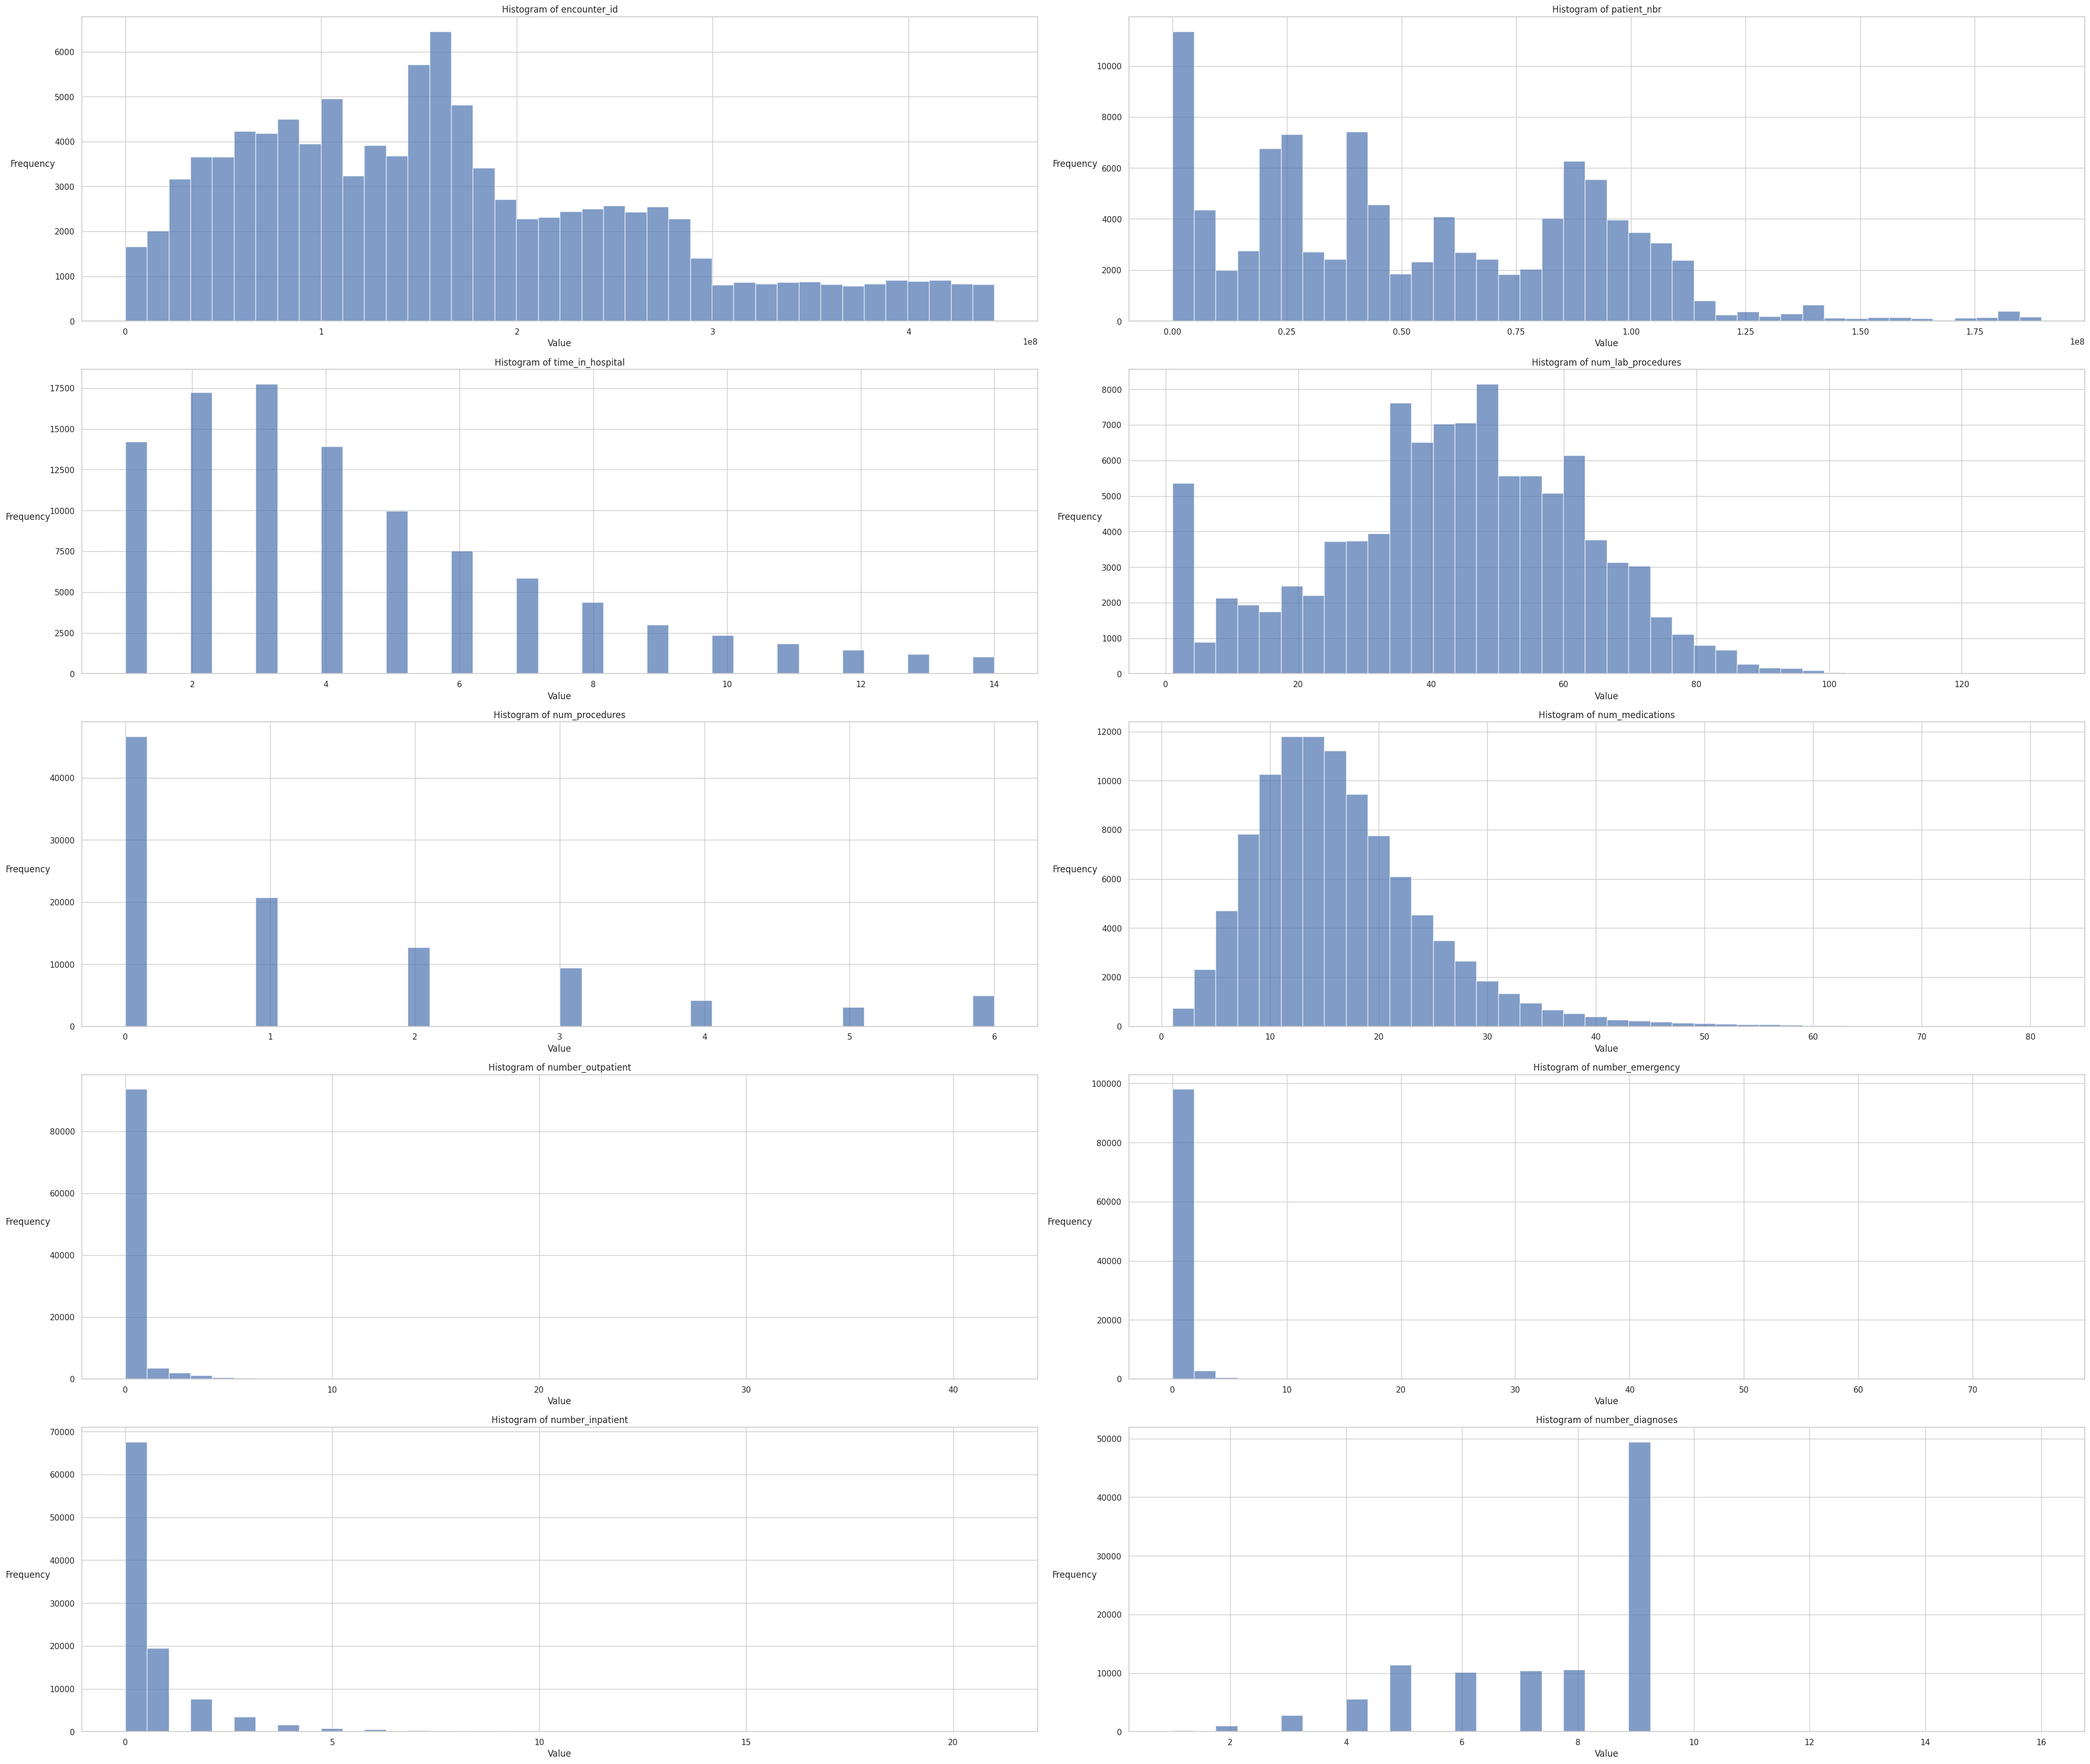

In [ ]:
import matplotlib.pyplot as plt

# Set the aesthetics for seaborn
sns.set(style="whitegrid")

# Improved histograms
plt.figure(figsize=(40, 40))

# Iterate over each column in con_list
for i, column in enumerate(con_list):
    plt.subplot(len(con_list) // 2 + 1, 2, i + 1)

    # Calculate the range for the current column
    col_min, col_max = df[column].min(), df[column].max()

    # Plot histogram with custom range
    df[column].plot(kind='hist', bins=40, alpha=0.7, range=(col_min, col_max))
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency', rotation=0, labelpad=30)
    plt.grid(True)

    # Save each histogram as an image file
    # plt.savefig(f'histogram_{column}.png')

plt.tight_layout()
# plt.savefig(f'histograms.png')
plt.show()

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


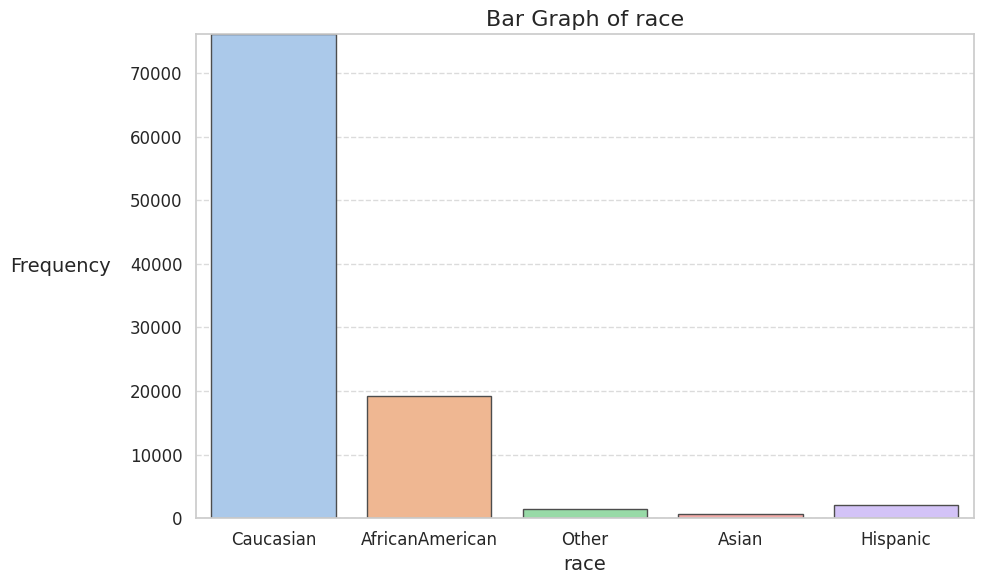

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


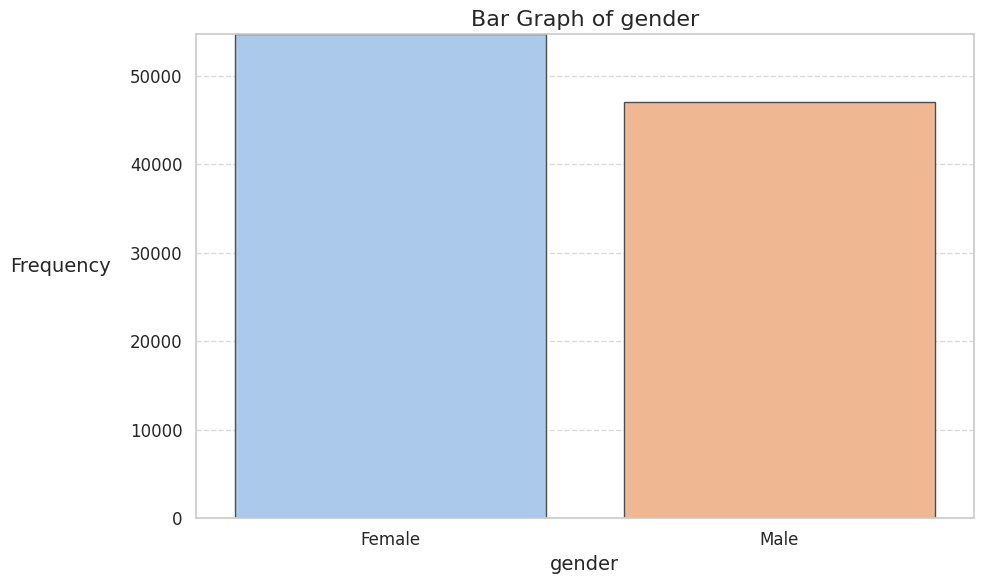

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


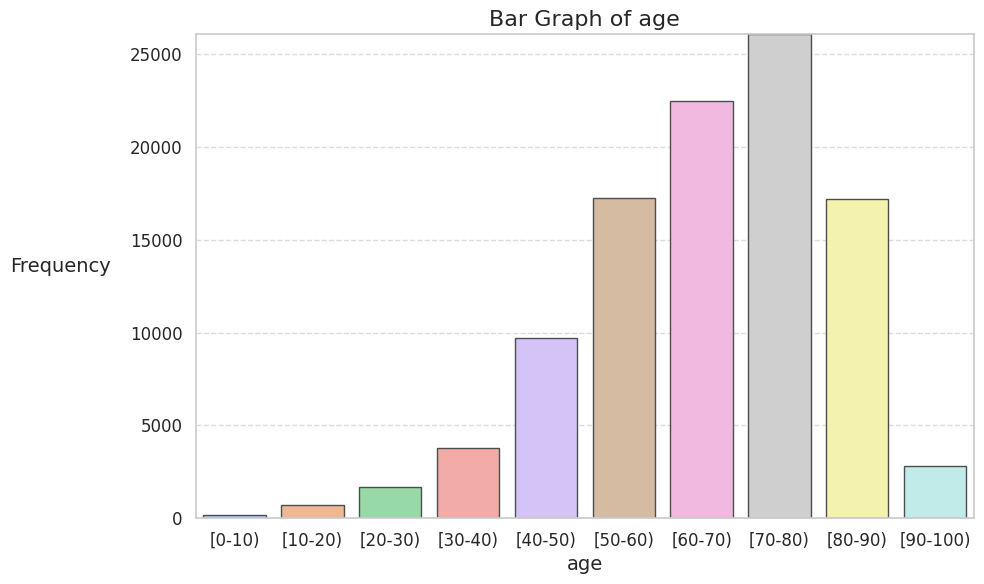

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


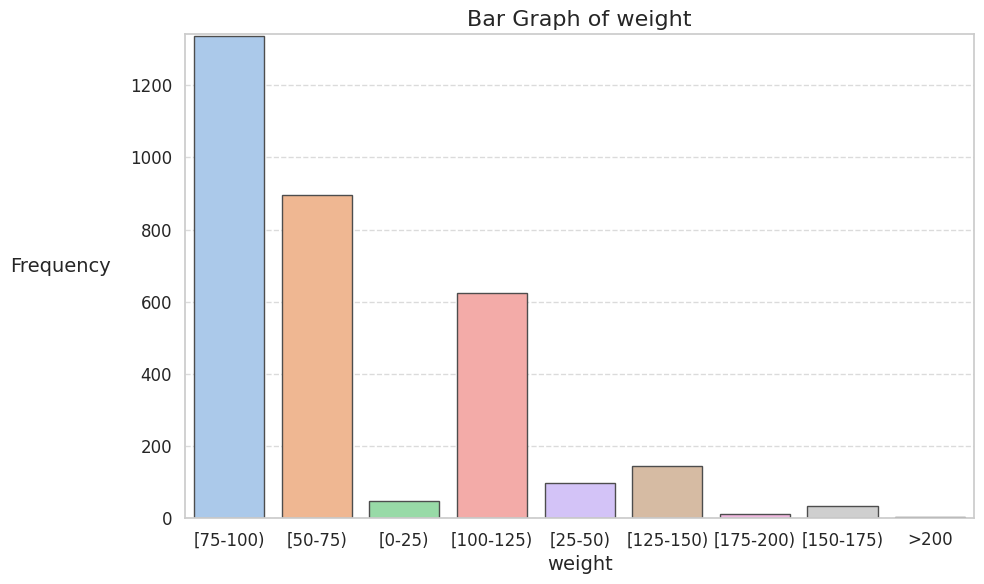

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


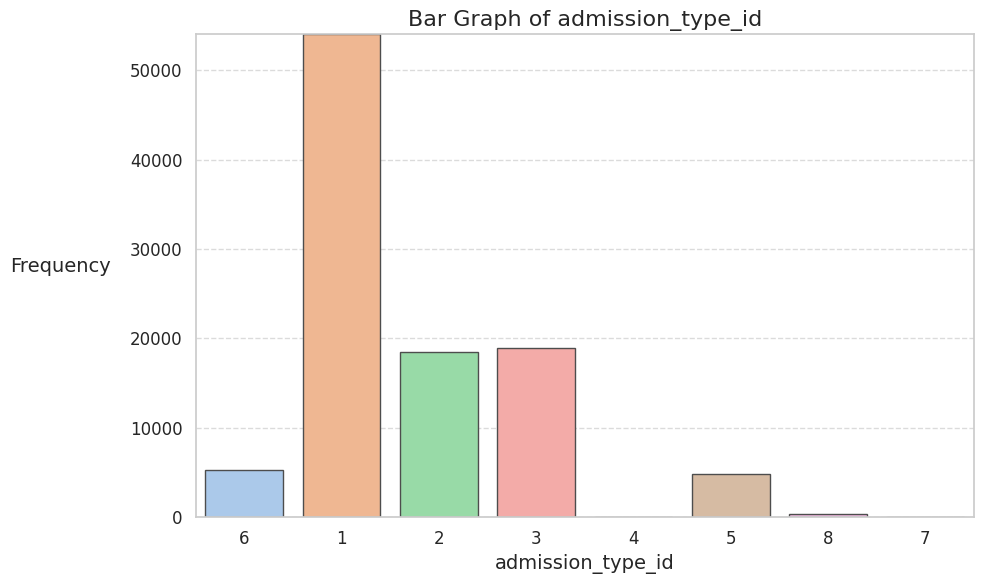

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


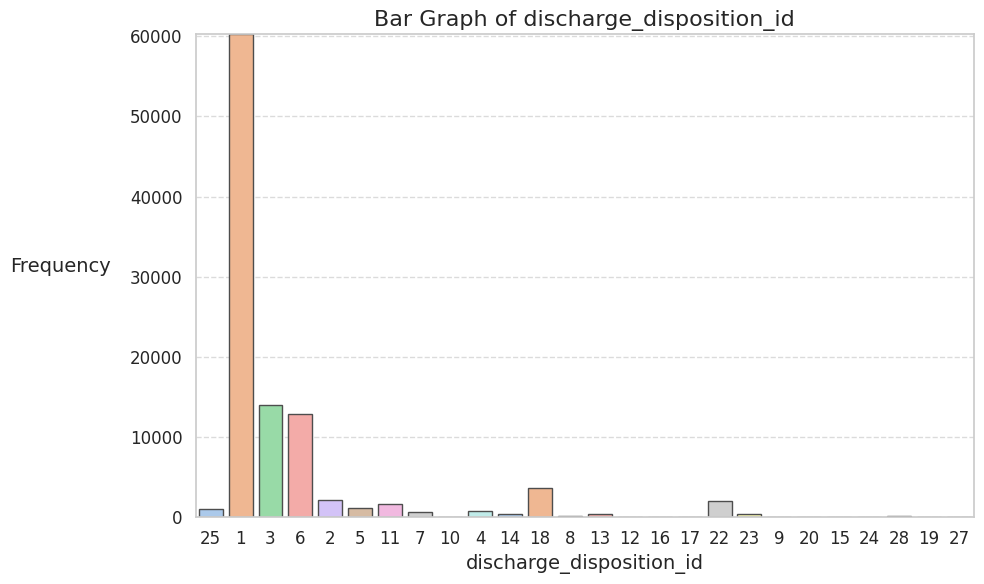

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


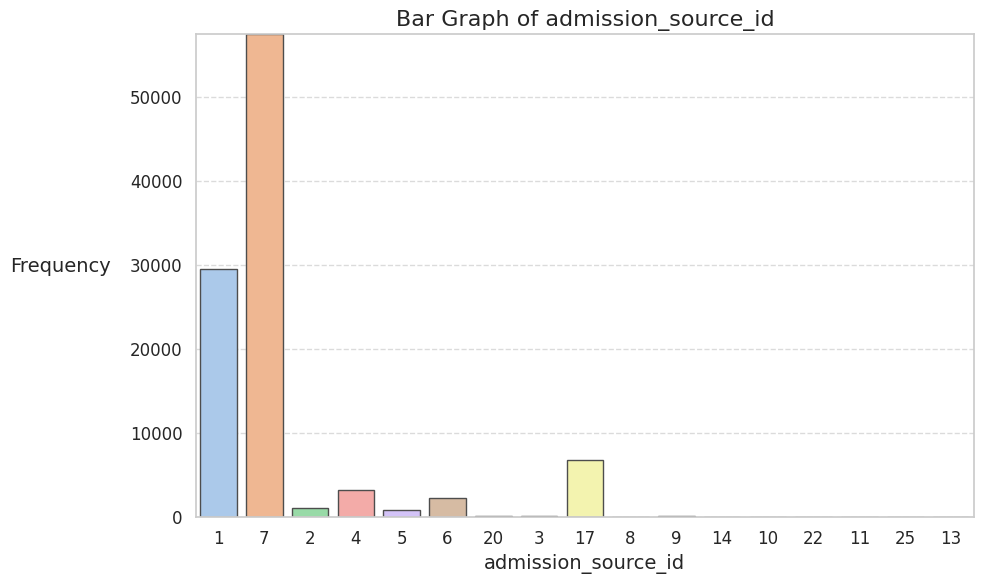

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


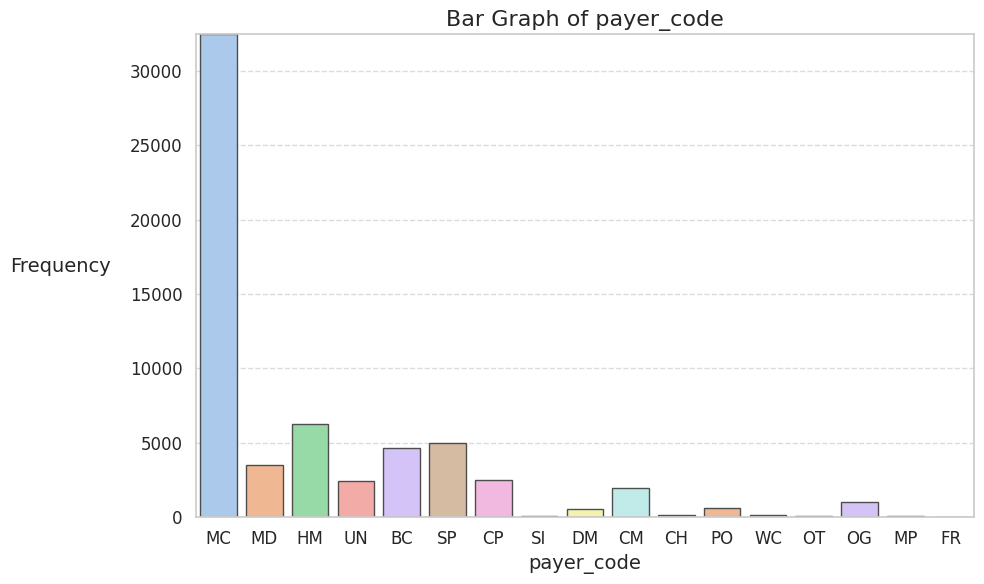

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


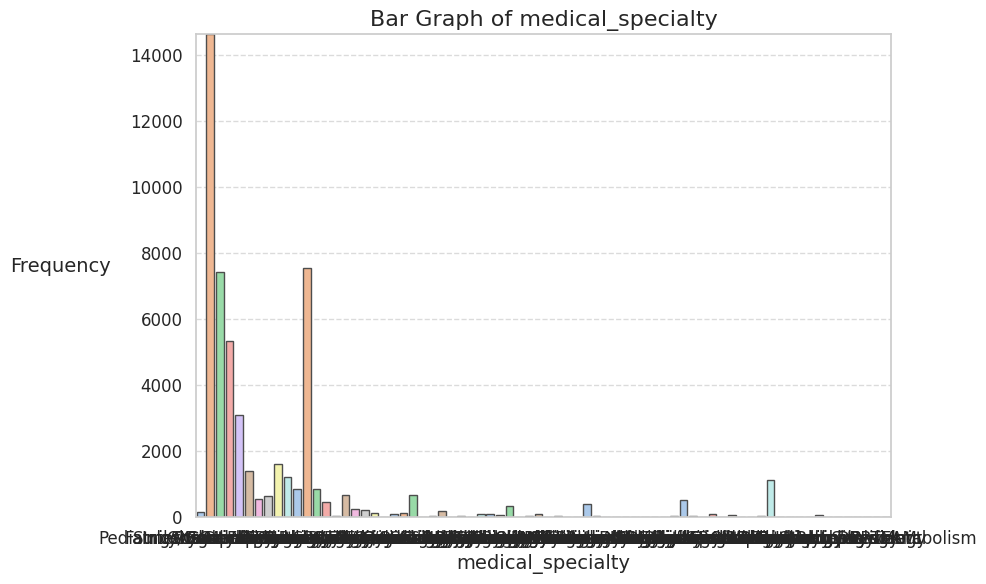

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


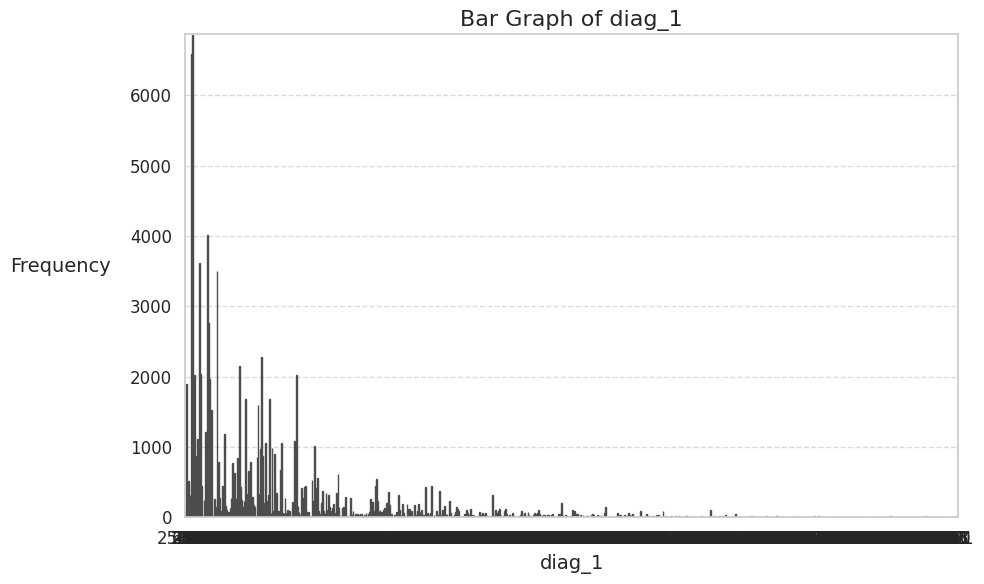

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


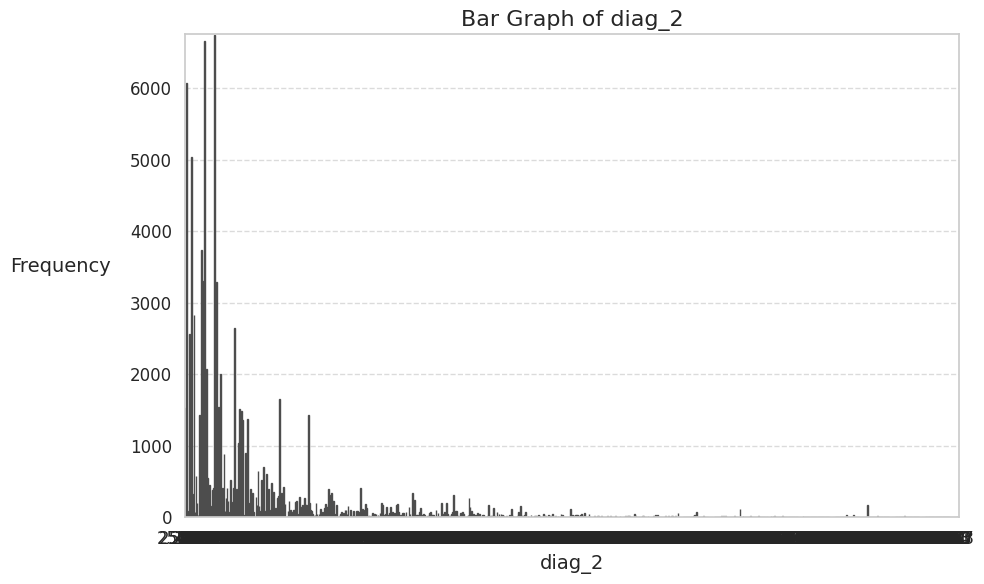

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


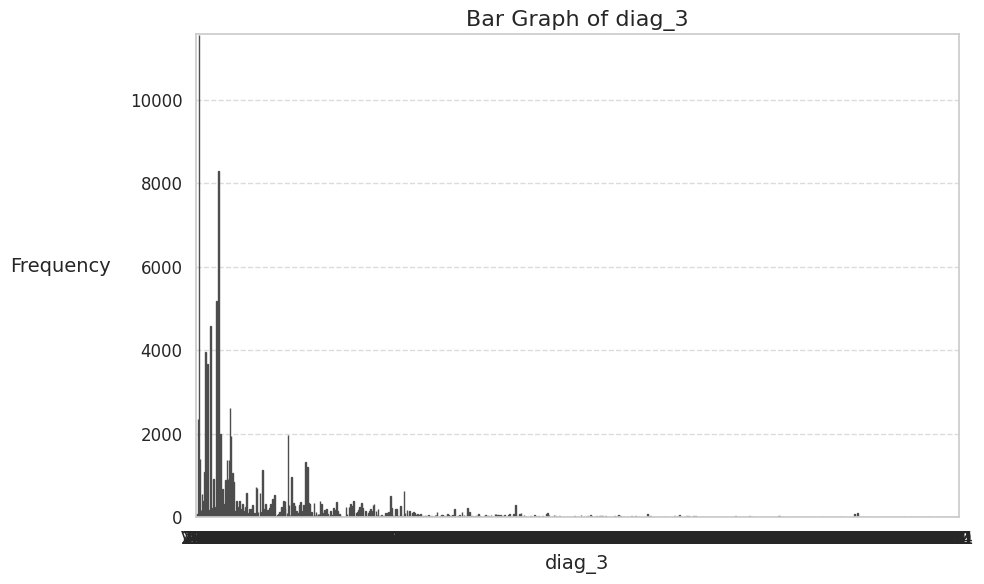

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


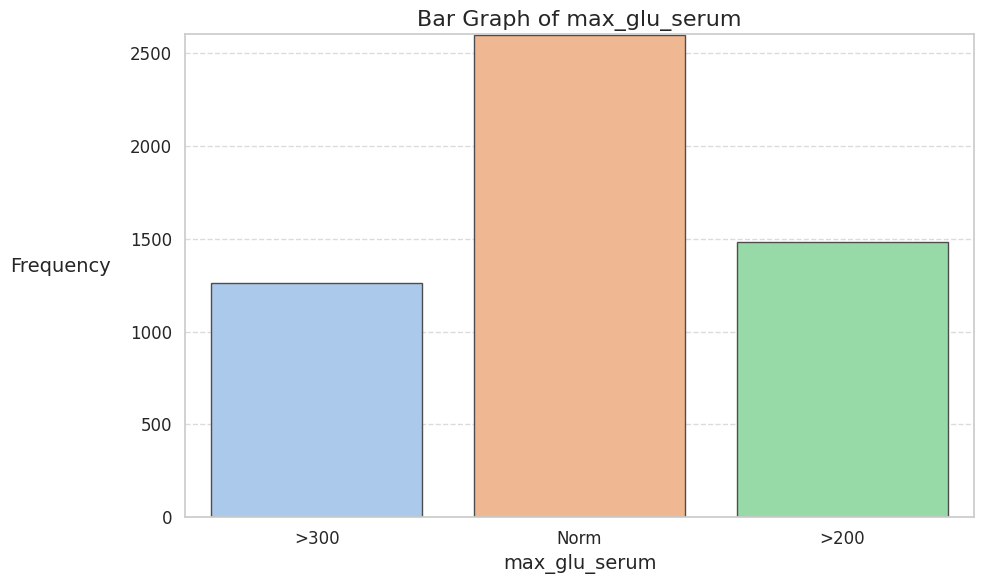

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


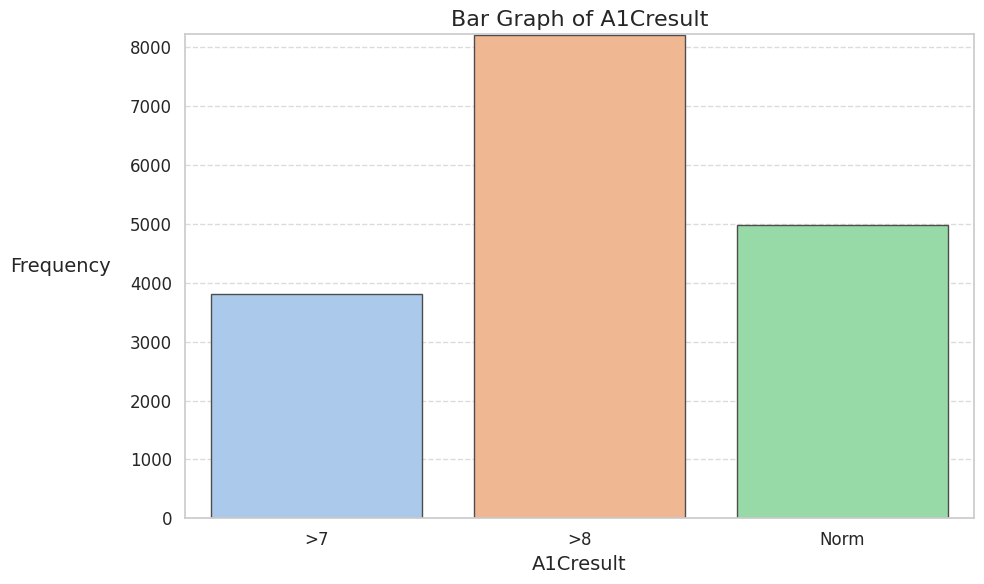

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


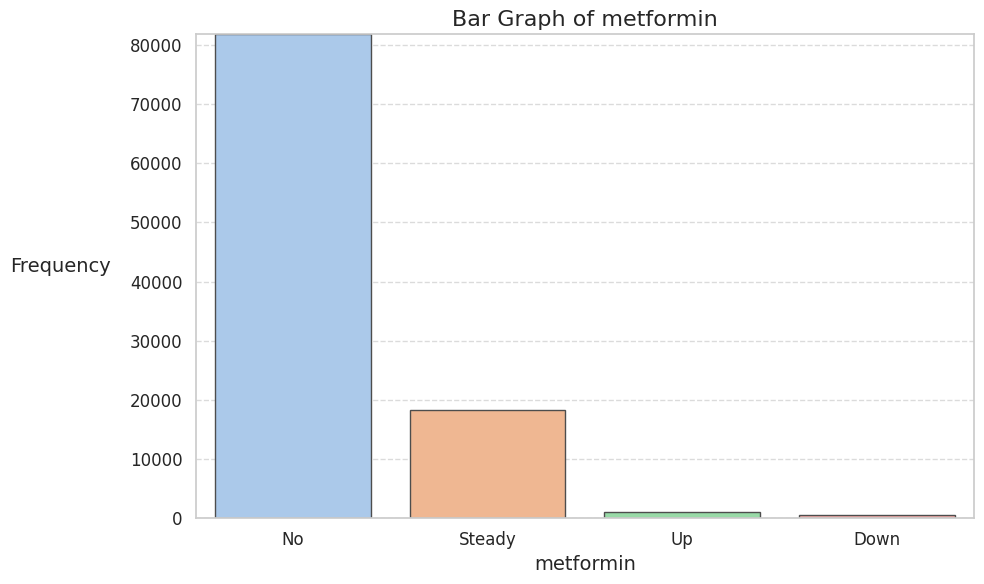

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


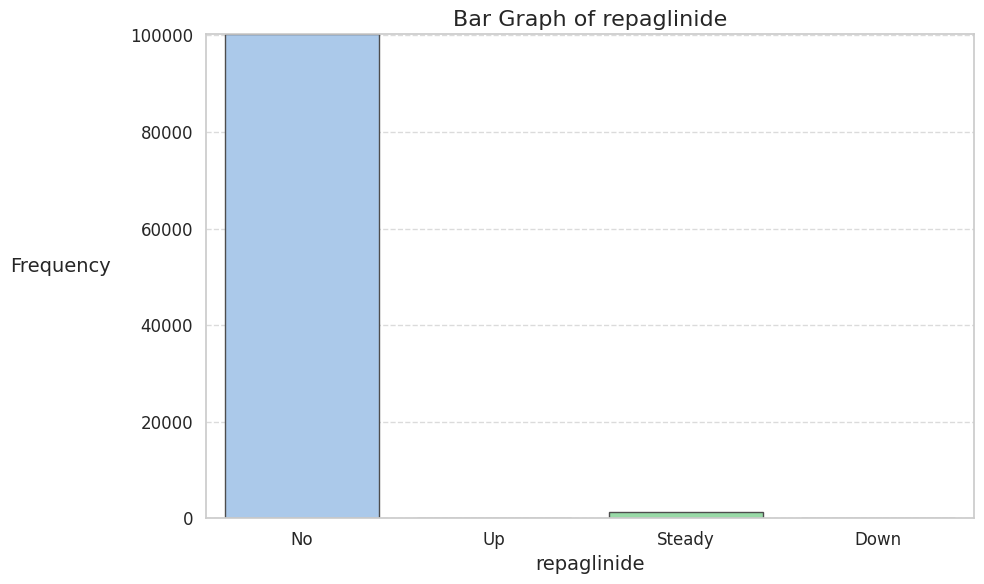

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


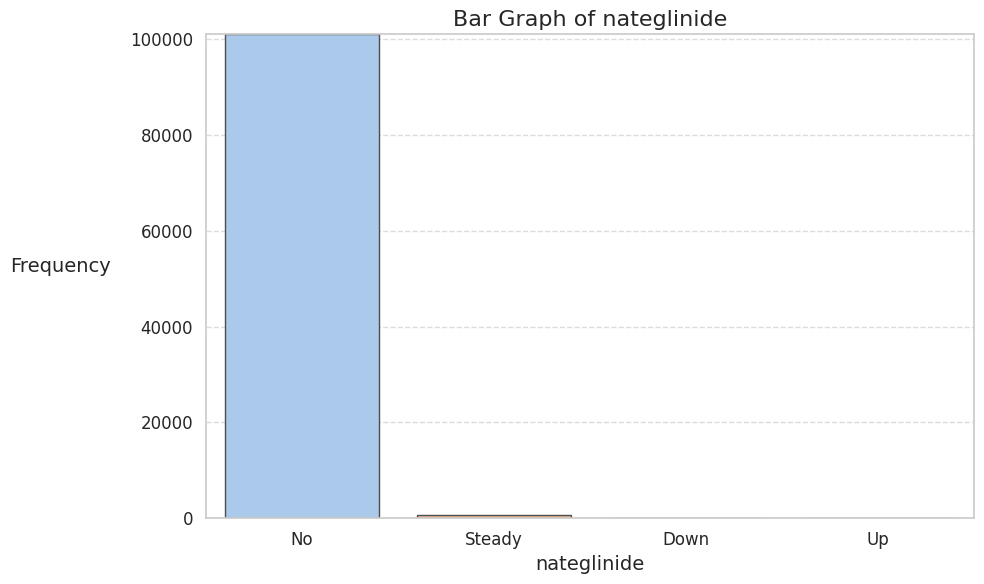

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


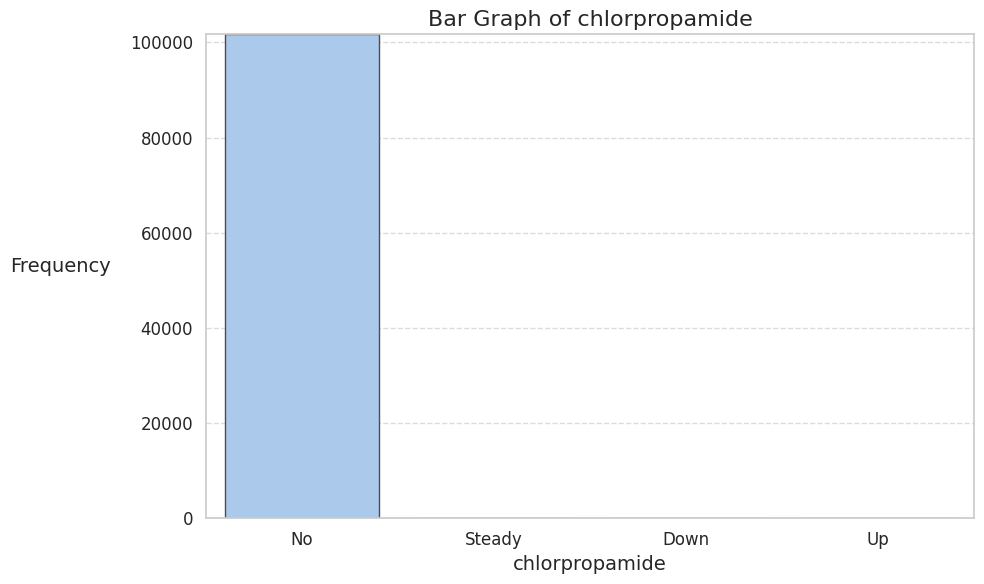

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


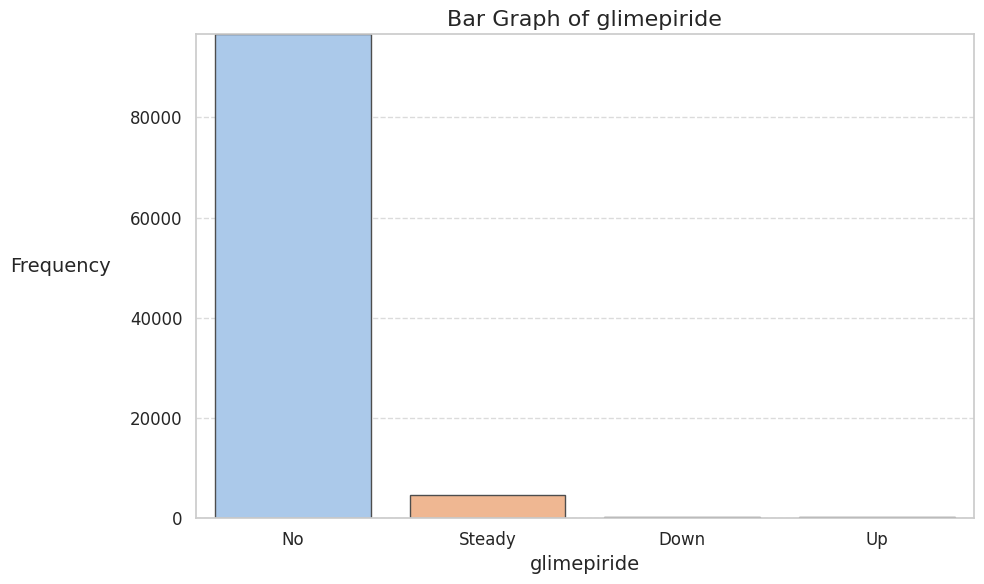

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


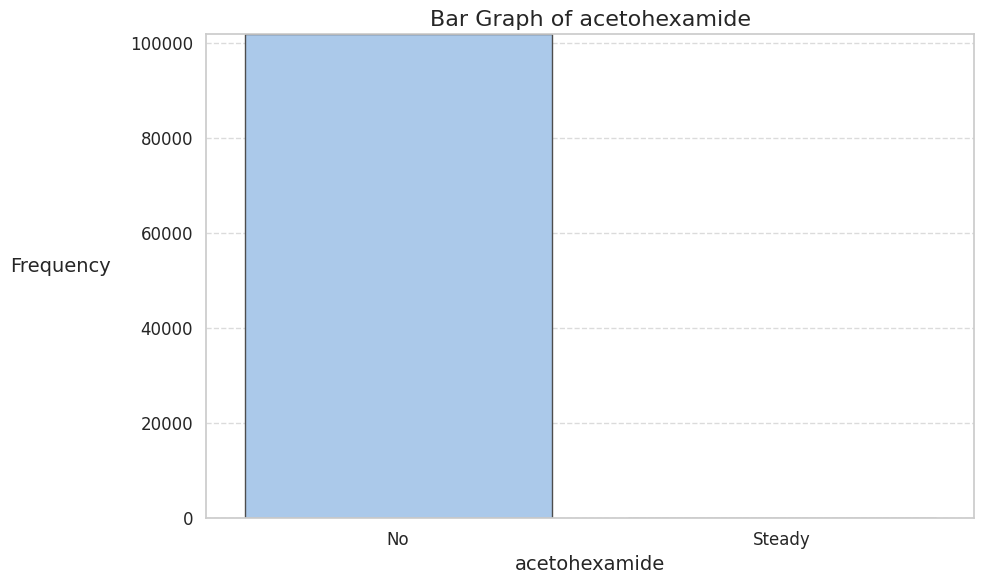

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


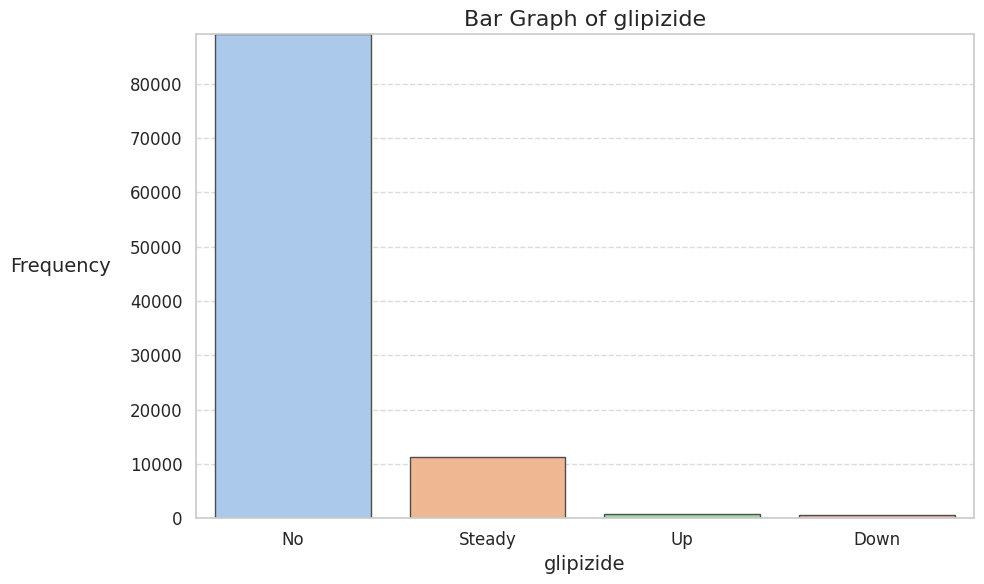

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


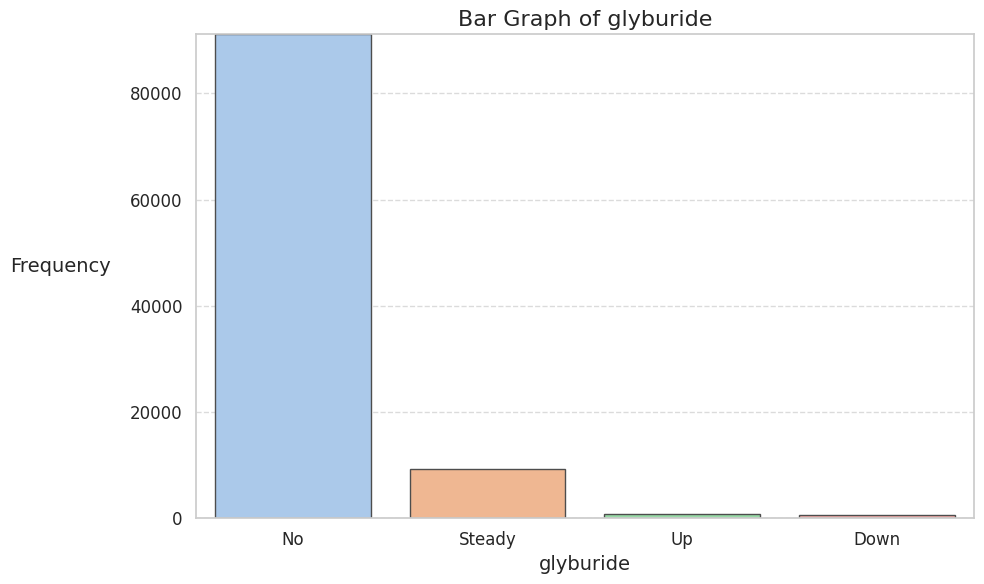

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


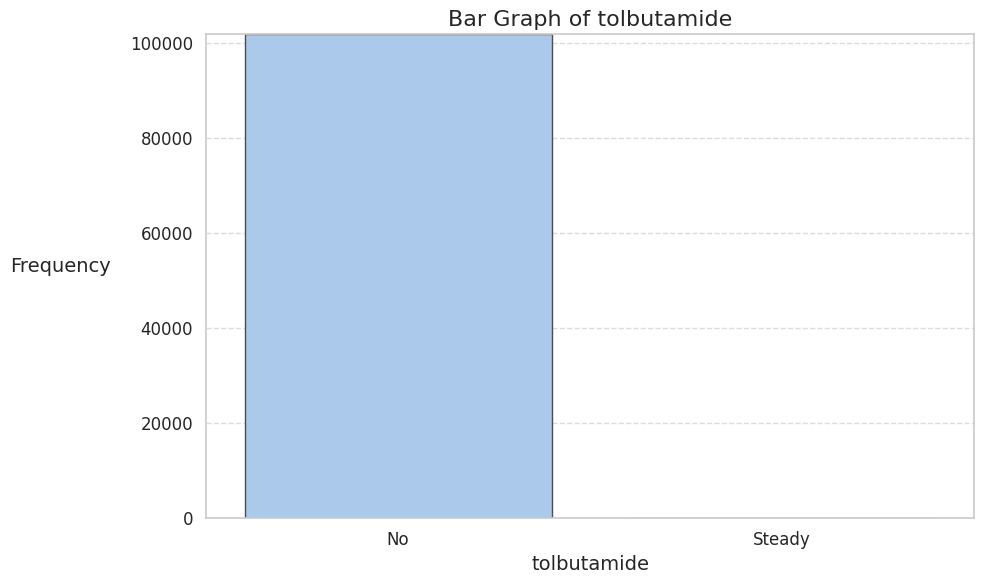

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


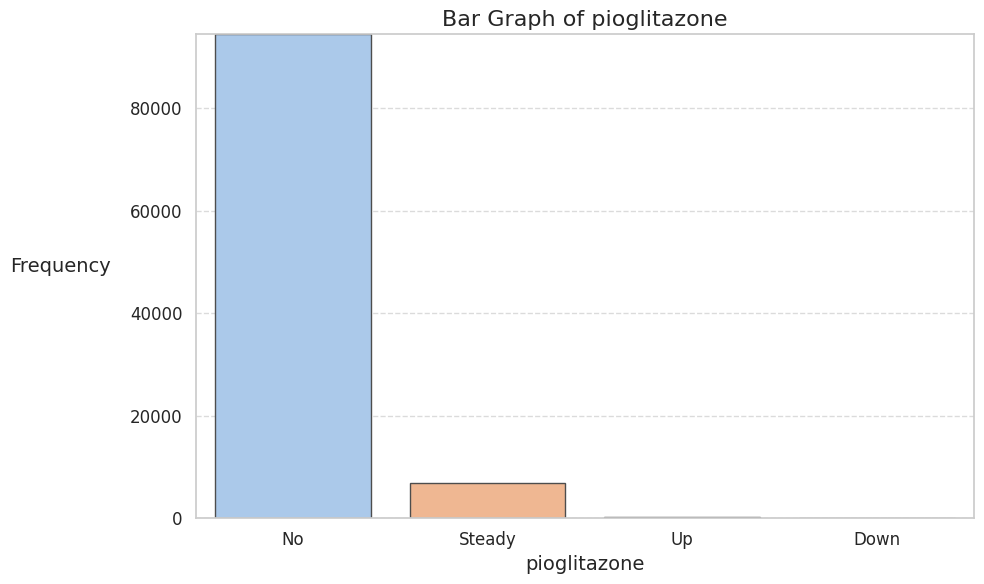

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


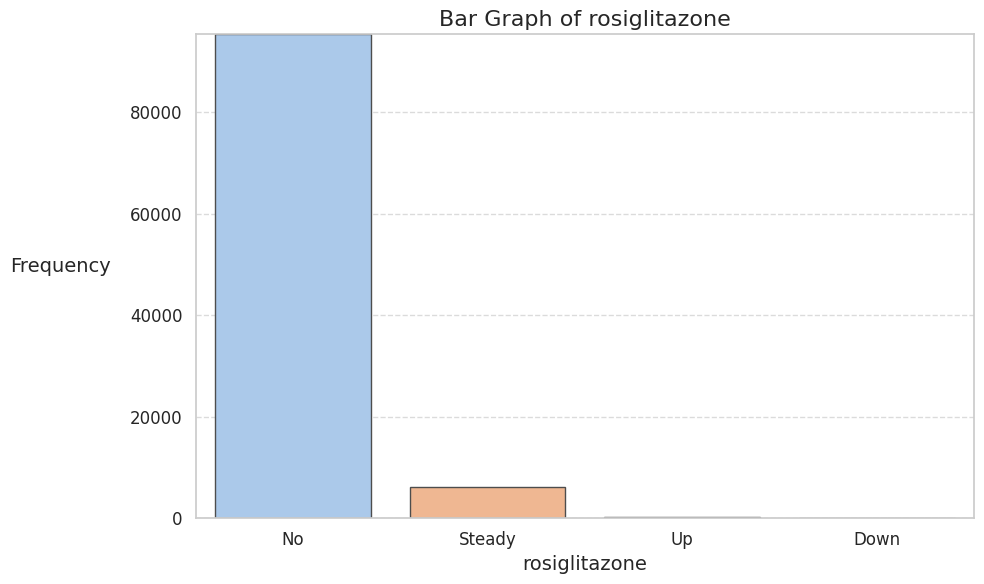

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


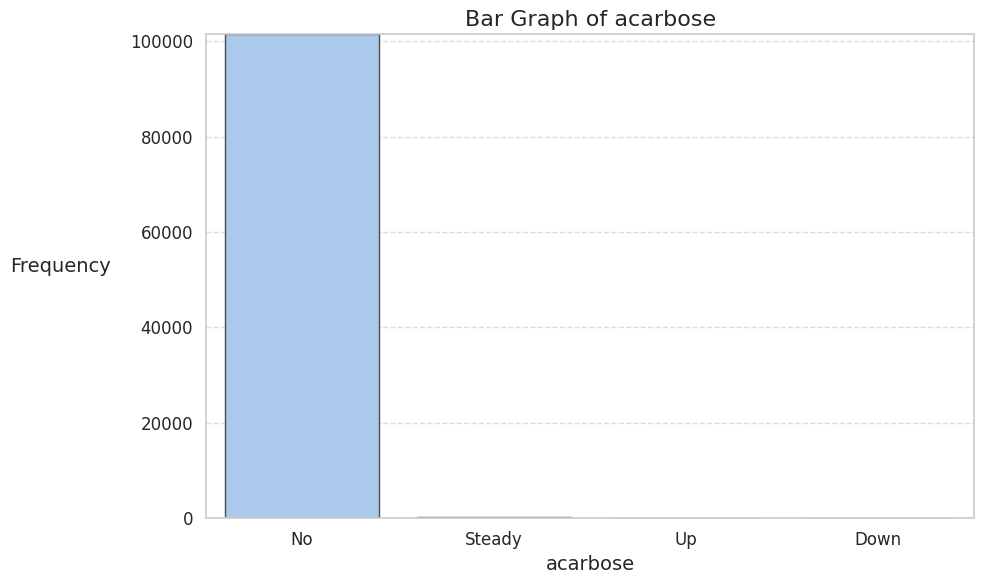

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


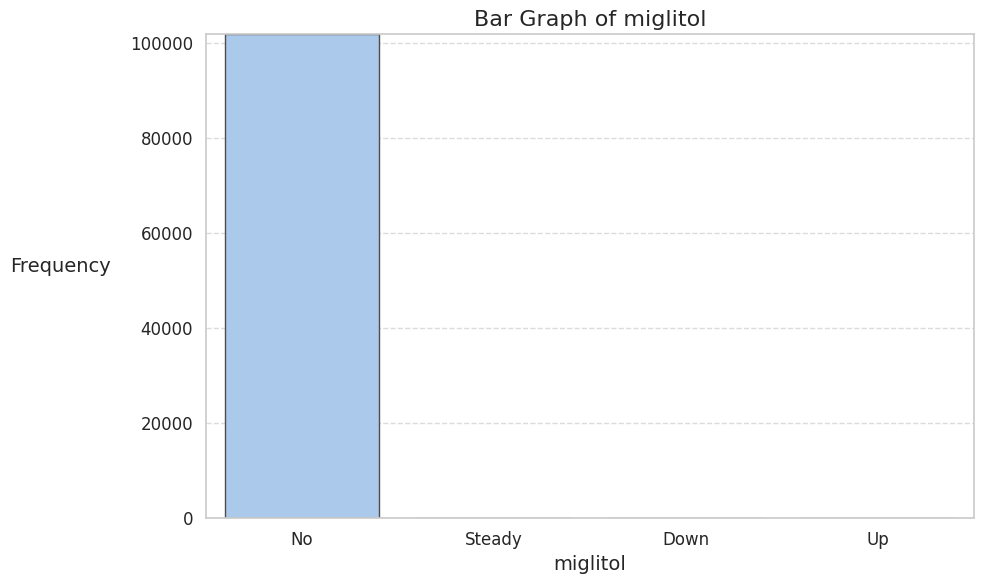

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


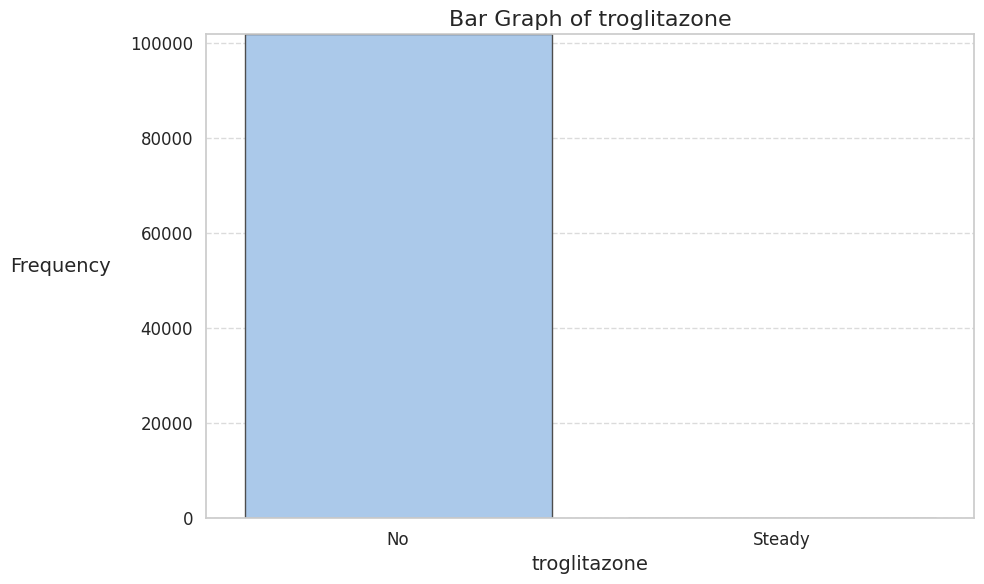

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


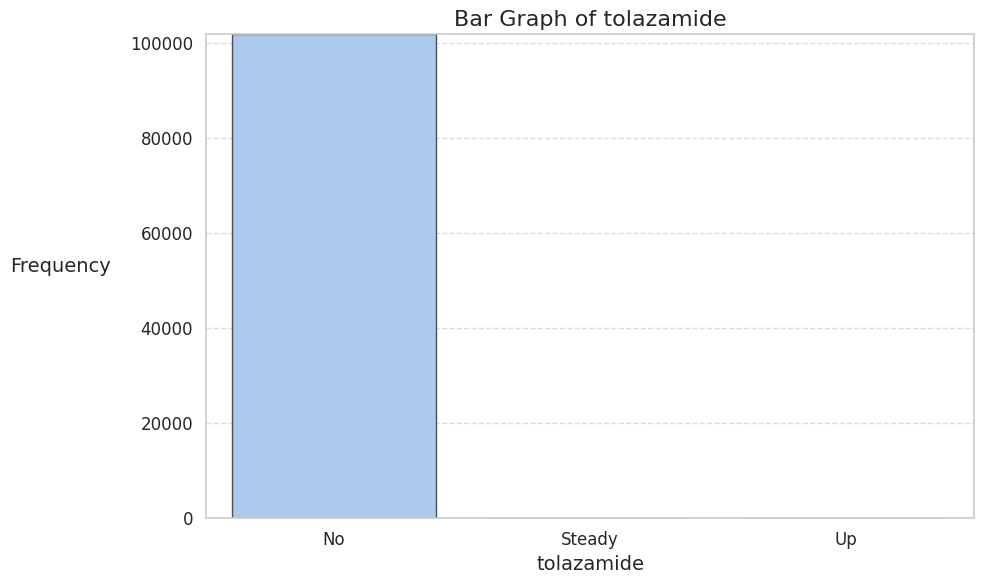

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


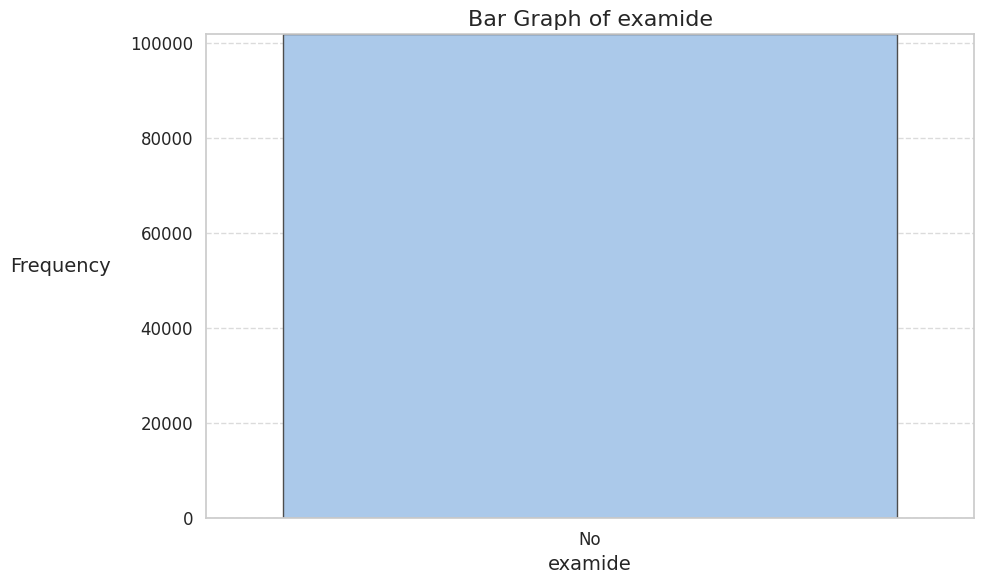

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


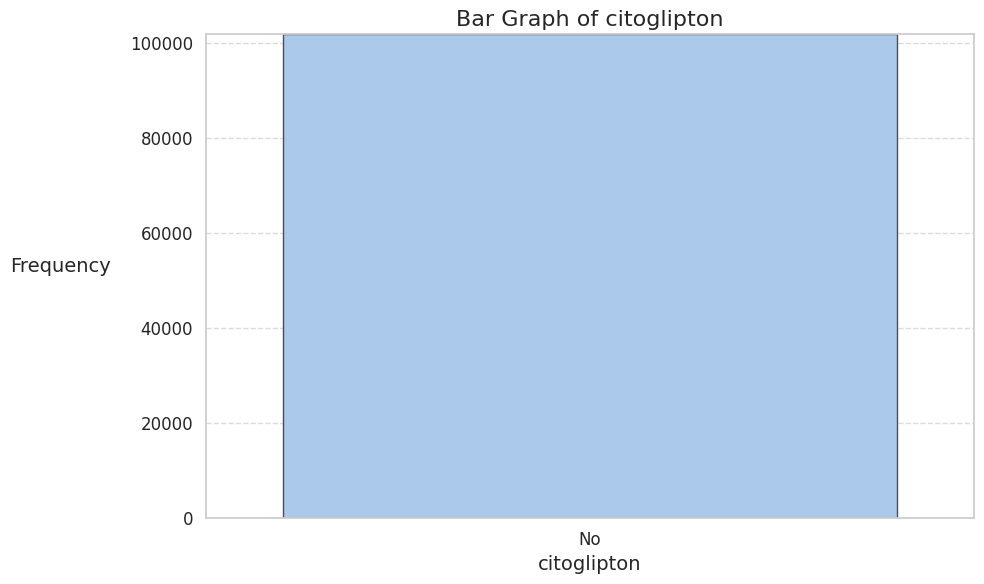

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


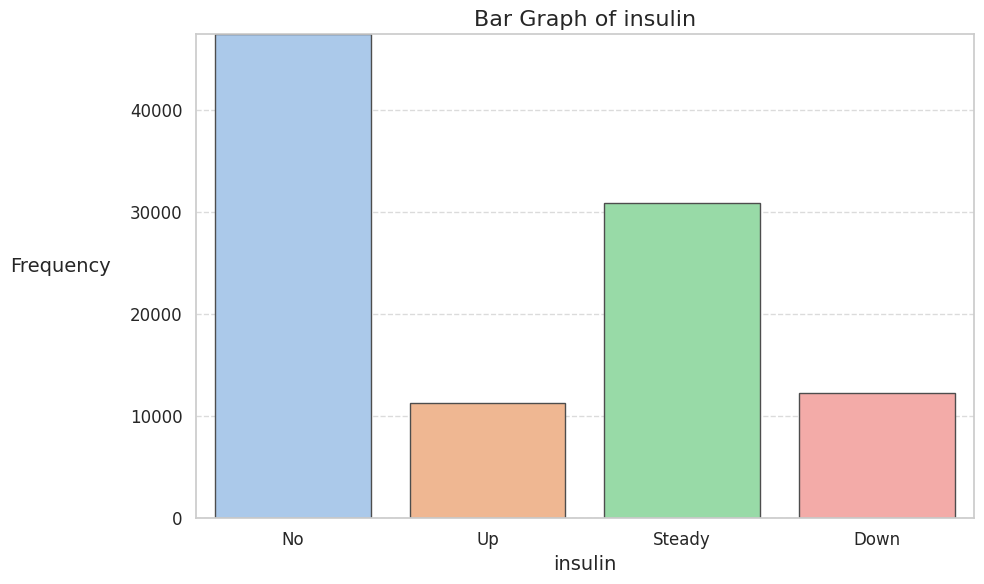

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


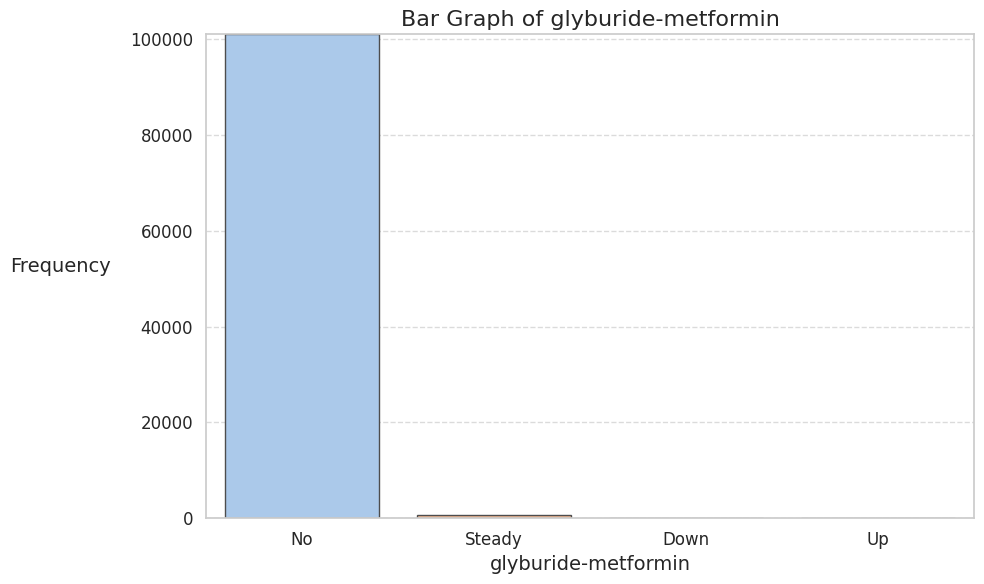

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


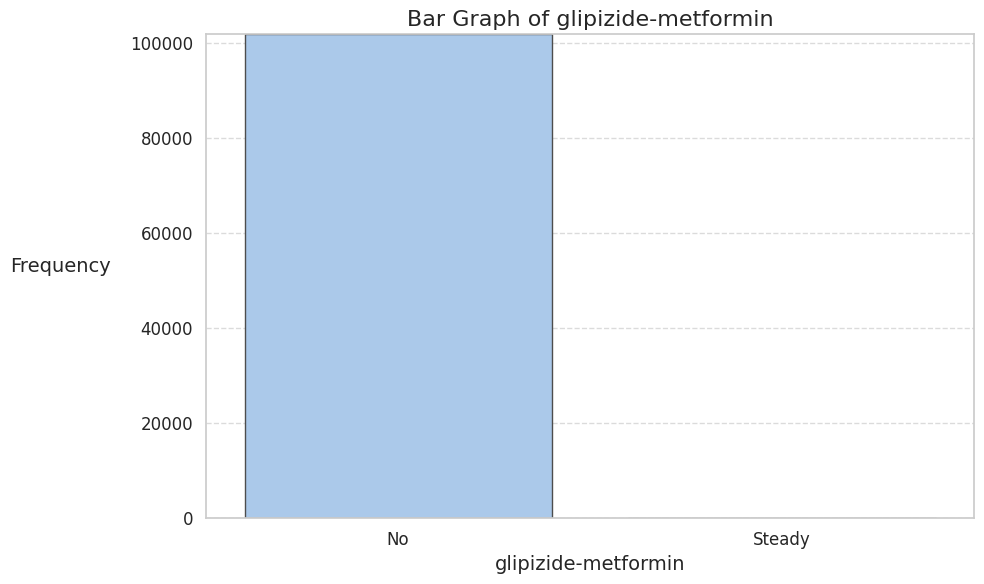

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


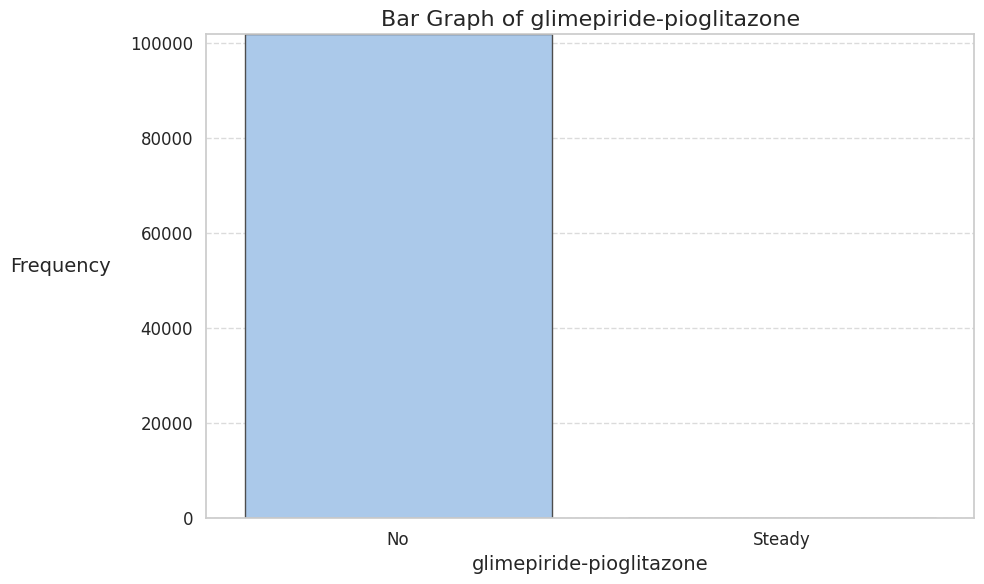

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


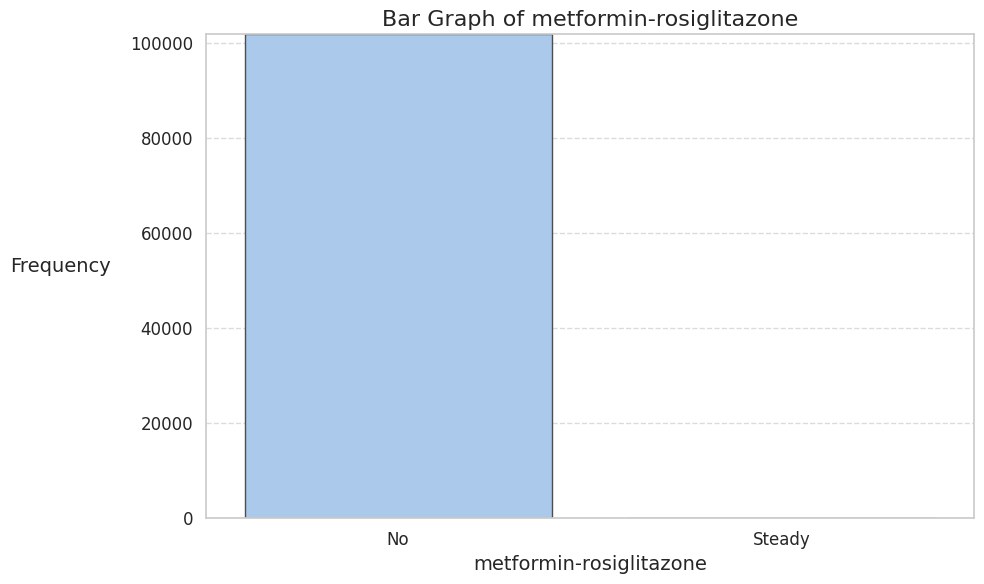

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


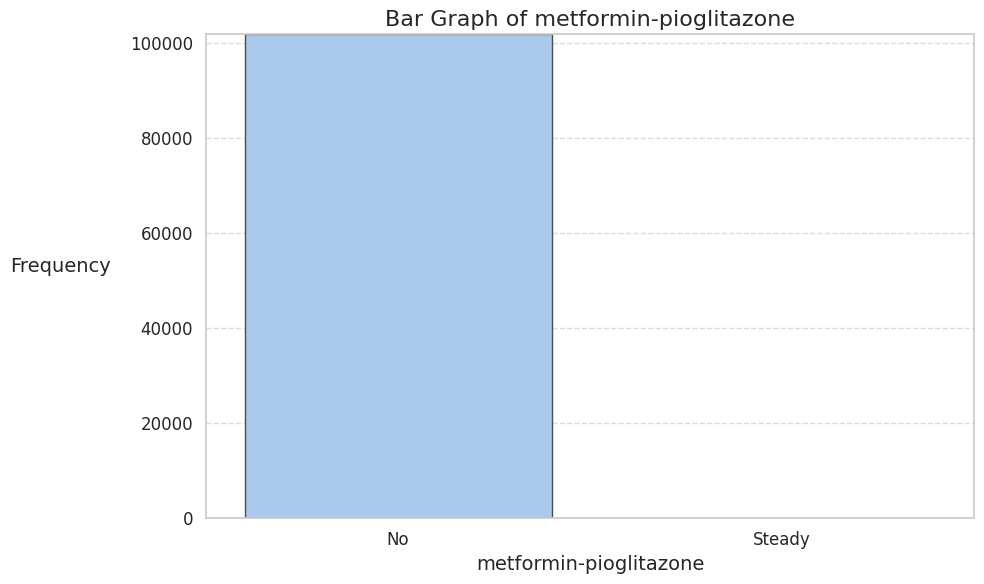

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


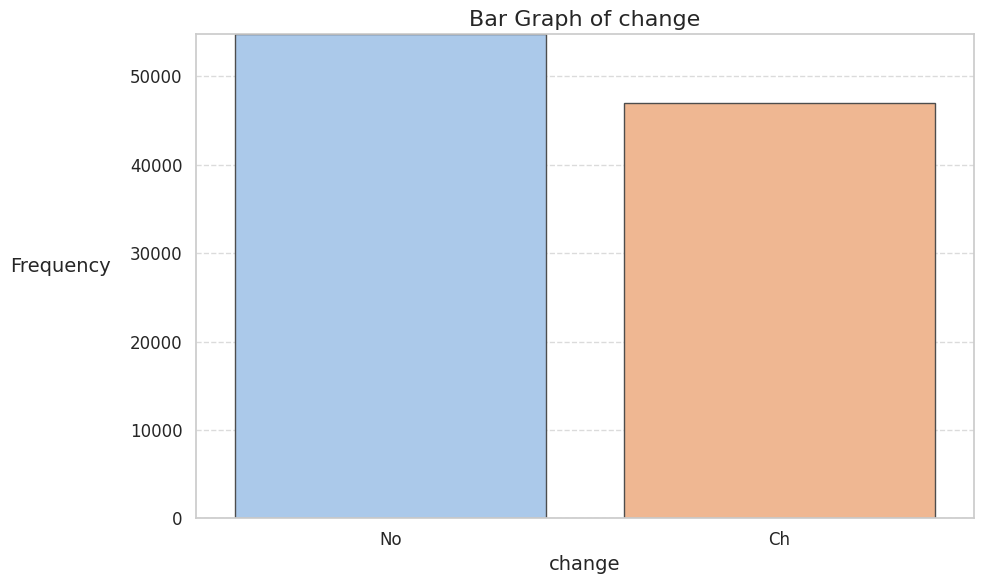

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


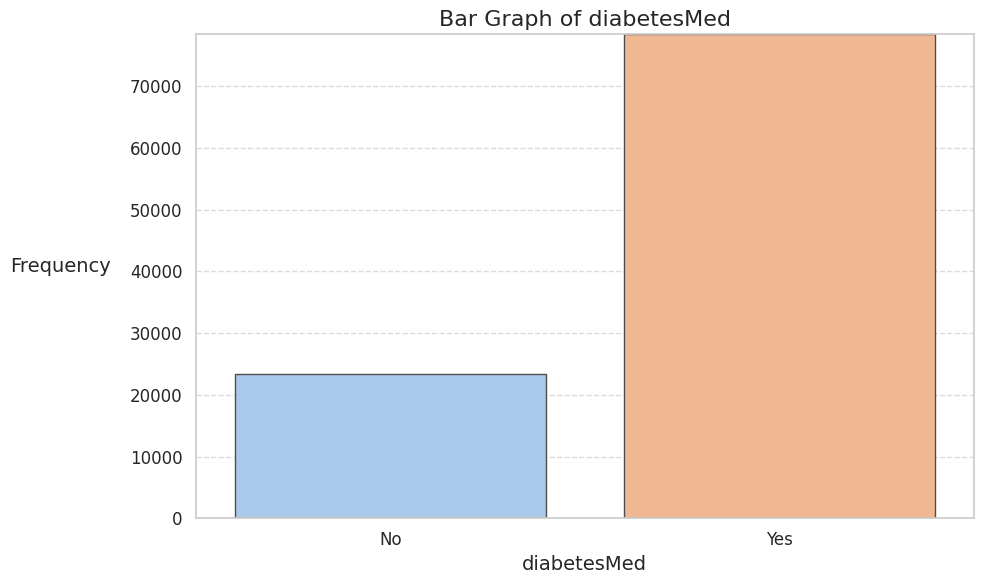

<ipython-input-237-179671f442ac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel", edgecolor=".3")


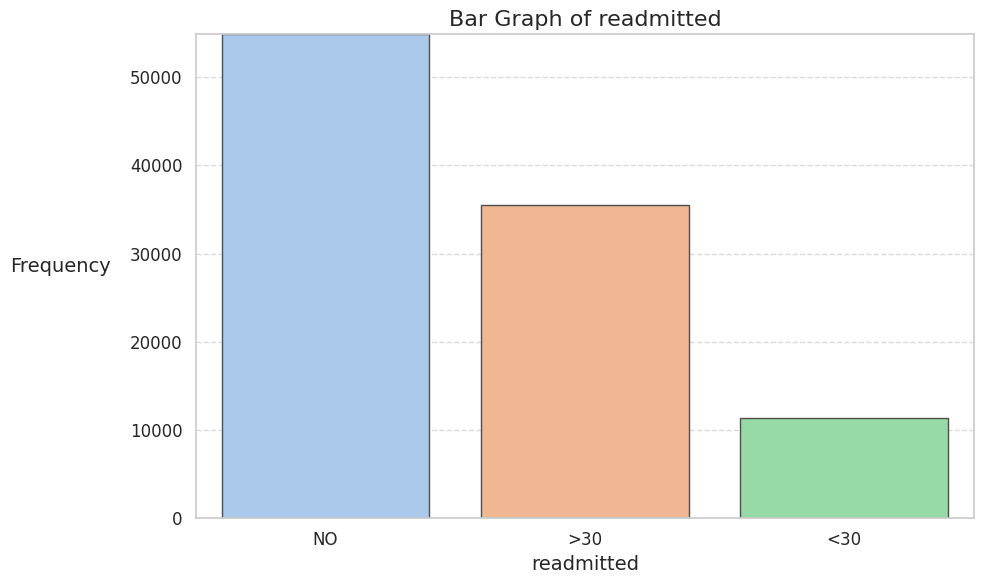

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for seaborn
sns.set(style="whitegrid")

# Improved bar graphs
for column in cat_list:
    plt.figure(figsize=(10, 6))

    # Get the maximum frequency for the current column
    max_freq = df[column].value_counts().max()

    sns.countplot(x=df[column], palette="pastel", edgecolor=".3")

    plt.title(f'Bar Graph of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14 , rotation=0, labelpad=50)
    plt.ylim(0, max_freq + 5)  # Set custom y-axis limit
    plt.xticks(fontsize=12, rotation=0)
    plt.yticks(fontsize=12)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()


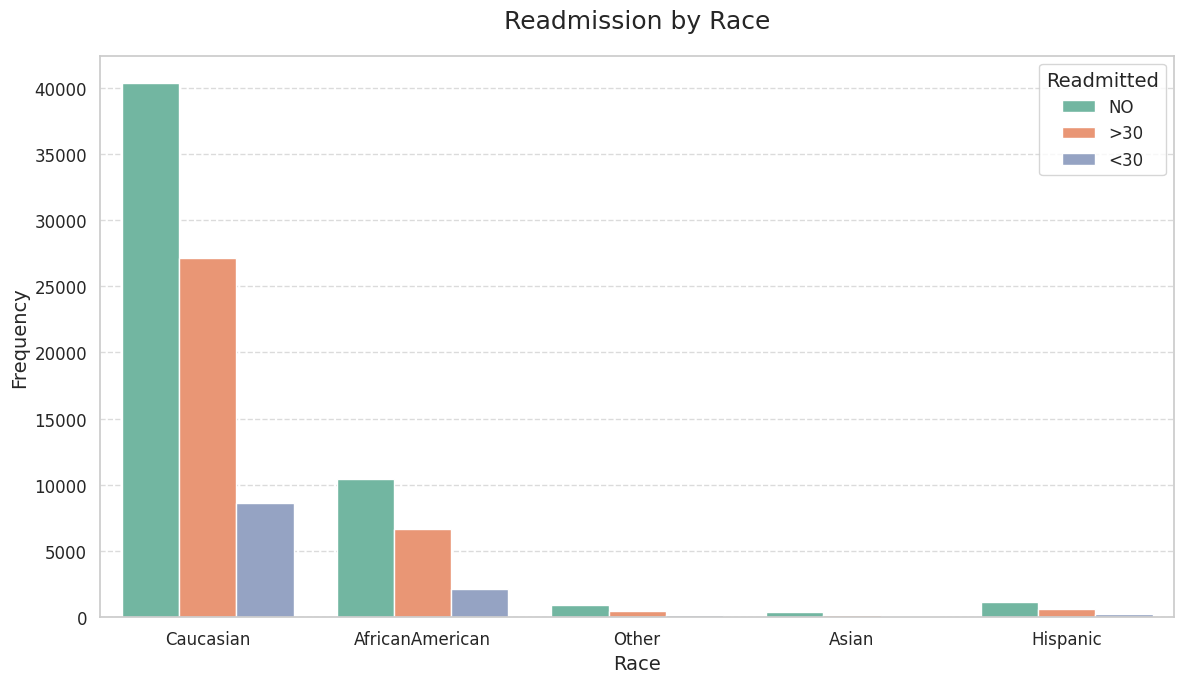

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for seaborn
sns.set(style="whitegrid")

# Improved count plot
plt.figure(figsize=(12, 7))
sns.countplot(x="race", hue="readmitted", data=df, palette="Set2")

# Title and labels
plt.title("Readmission by Race", fontsize=18, pad=20)
plt.xlabel("Race", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(title="Readmitted", fontsize=12, title_fontsize=14)

# Tight layout to adjust spacing
plt.tight_layout()

# Show the plot
plt.show()



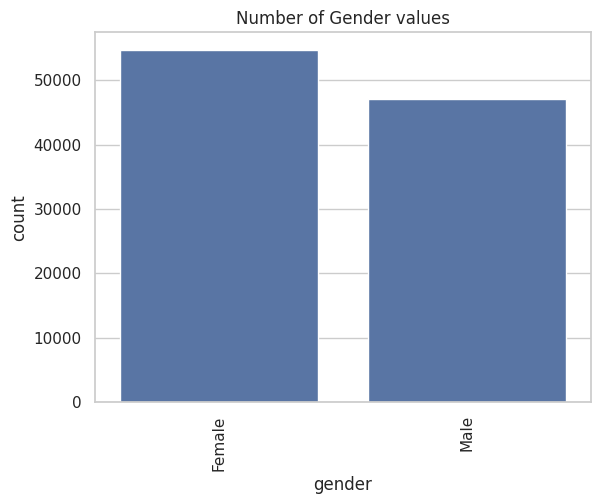

In [ ]:
sns.countplot(x=df.gender, data = df)
plt.xticks(rotation=90)
plt.title("Number of Gender values")
plt.show()

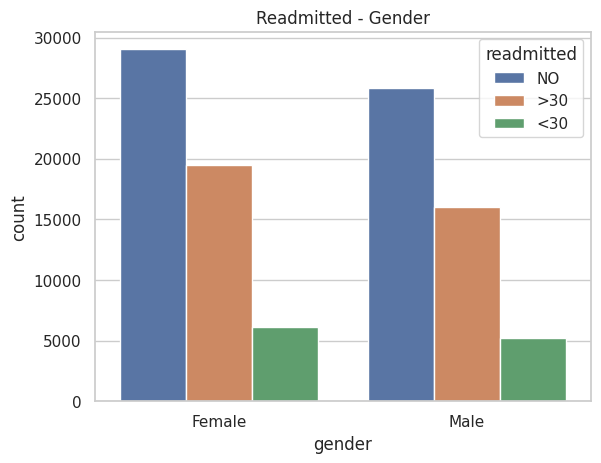

In [ ]:
sns.countplot(x="gender", hue= "readmitted", data = df)
plt.title("Readmitted - Gender")
plt.show()

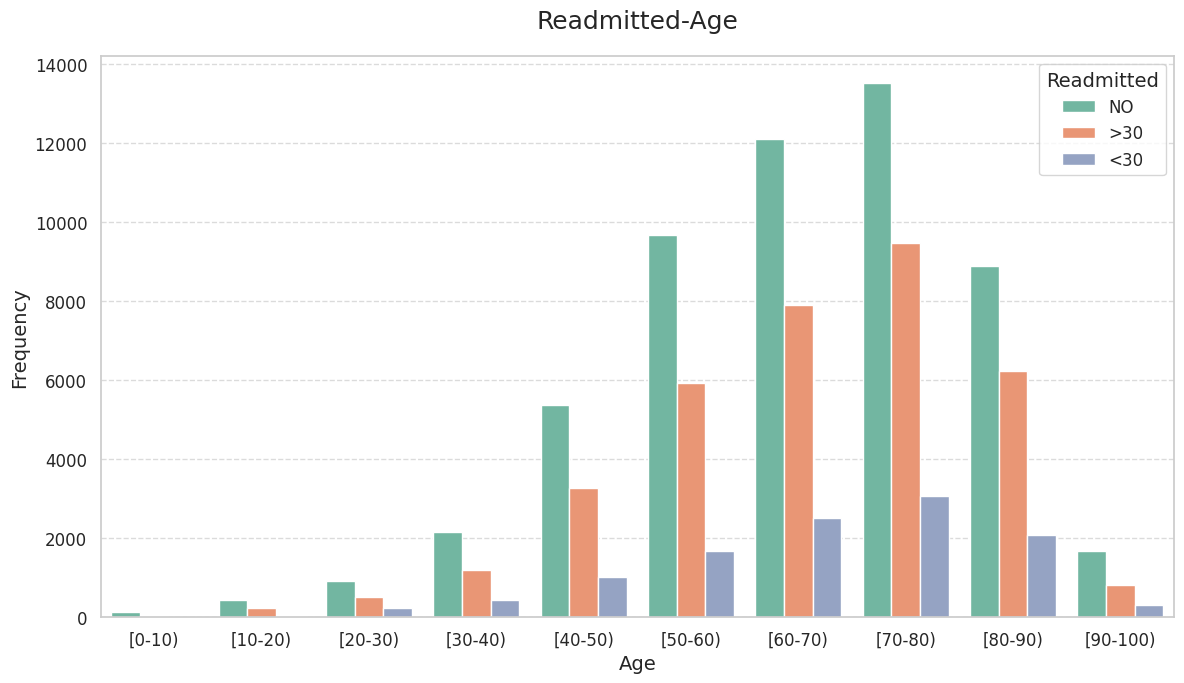

In [ ]:
# Set the aesthetics for seaborn
sns.set(style="whitegrid")

# Improved count plot
plt.figure(figsize=(12, 7))
sns.countplot(x="age", hue="readmitted", data=df, palette="Set2")

# Title and labels
plt.title("Readmitted-Age", fontsize=18, pad=20)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(title="Readmitted", fontsize=12, title_fontsize=14)

# Tight layout to adjust spacing
plt.tight_layout()

# Show the plot
plt.show()



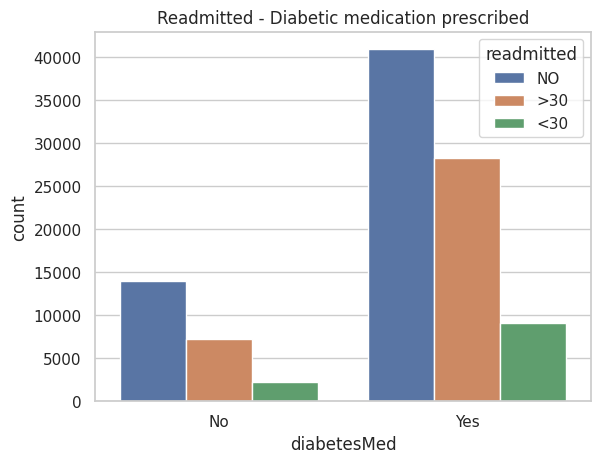

In [ ]:
sns.countplot(x="diabetesMed", hue= "readmitted", data = df)
plt.title("Readmitted - Diabetic medication prescribed")
plt.show()

In [ ]:
cont_var = ['patient_nbr','time_in_hospital','num_lab_procedures',
            'num_procedures','num_medications','number_outpatient','number_emergency',
            'number_inpatient','number_diagnoses'
]
correlation_matrix = df[cont_var].corr()
threshold = 0.2
important_corr = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]

# Display important correlations

# display(important_corr.style.background_gradient(cmap='Blues'))
important_corr


,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
patient_nbr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.226847
time_in_hospital,NaN,NaN,0.318450,NaN,0.466135,NaN,NaN,NaN,0.220186
num_lab_procedures,NaN,0.318450,NaN,NaN,0.268161,NaN,NaN,NaN,NaN
num_procedures,NaN,NaN,NaN,NaN,0.385767,NaN,NaN,NaN,NaN
num_medications,NaN,0.466135,0.268161,0.385767,NaN,NaN,NaN,NaN,0.261526
number_outpatient,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_emergency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266559,NaN
number_inpatient,NaN,NaN,NaN,NaN,NaN,NaN,0.266559,NaN,NaN
number_diagnoses,0.226847,0.220186,NaN,NaN,0.261526,NaN,NaN,NaN,NaN


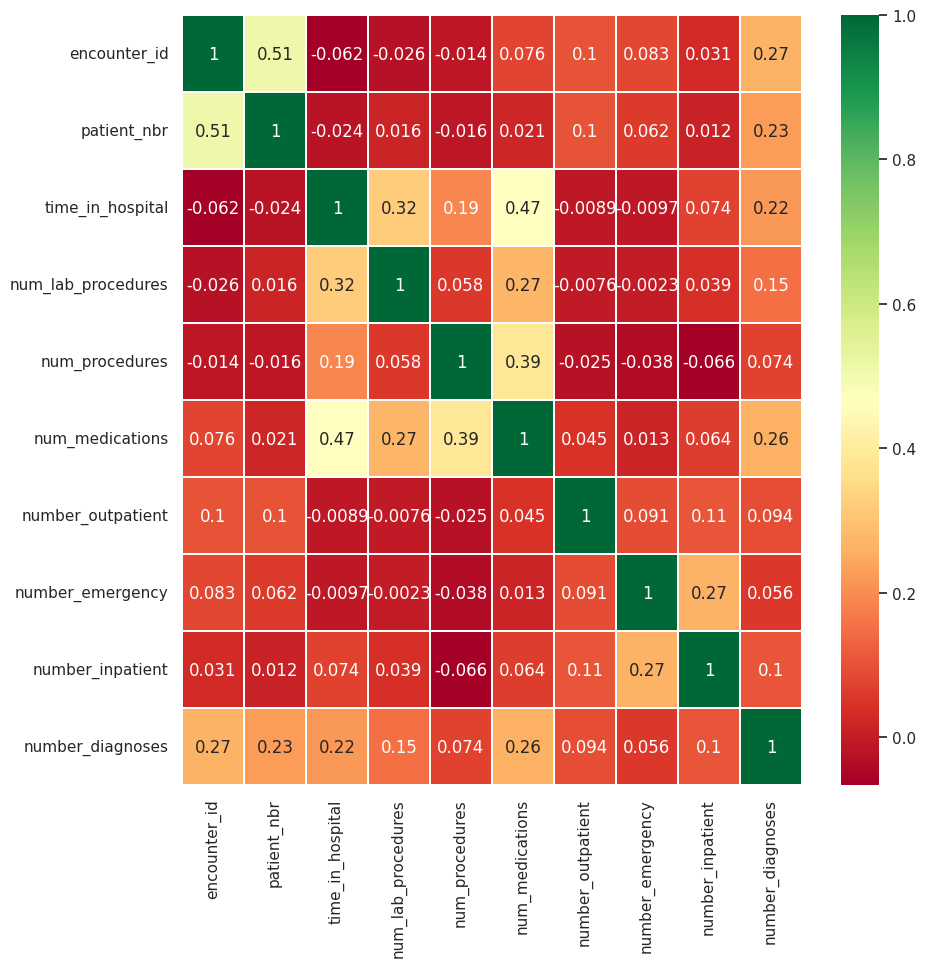

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

## Drop Missing values and unneccesary data

In [ ]:
#drop examide citoglipton bc cardinality is 1 and all instances have the same value
#drop weight max_glu_serum A1Cresult medical_specialty payer_code bc of percentage of missing data is too high
#drop patient_nbr identifies patient and if patient has visited multiple times then they would biased the data. So keep first instance of patient and remove all other instances
#Drop patient encounter_id and patient_nbr bc it is not needed bc identifying individual patients can be indentified by index number


# 100 percent: examide and citoglipton

# 99 percent stays steady: 'metformin-rosiglitazone', 'troglitazone', 'tolazamide', 'glipizide-metformin',
# 'glyburide-metformin', 'metformin-pioglitazone', 'glimepiride-pioglitazone', 'acarbose', 'miglitol', 'tolbutamide',
# 'acetohexamide', 'chlorpropamide' , 'nateglinide'


drop_list = ['examide' , 'citoglipton', 'weight','medical_specialty','payer_code',
             'metformin-rosiglitazone', 'troglitazone', 'tolazamide', 'glipizide-metformin',
             'glyburide-metformin', 'metformin-pioglitazone', 'glimepiride-pioglitazone',
             'acarbose', 'miglitol', 'tolbutamide','acetohexamide', 'chlorpropamide' , 'nateglinide']

df.drop(drop_list,axis=1, inplace=True)

In [ ]:
# drop where gender is not known
df.dropna(subset=['gender'], how='all', inplace = True)

In [ ]:
# fill race with mode
df["race"].fillna(df["race"].mode()[0], inplace = True)

<ipython-input-247-94f96a764e4e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["race"].fillna(df["race"].mode()[0], inplace = True)


In [ ]:
# drop diagnosis when not known

df.dropna(subset=['diag_1'], how='all', inplace = True)
df.dropna(subset=['diag_2'], how='all', inplace = True)
df.dropna(subset=['diag_3'], how='all', inplace = True)


In [ ]:
# Drop duplicates based on 'patient_nbr'
df.drop_duplicates(subset='patient_nbr', keep='first', inplace=True)

# Drop specified columns
columns_to_drop = ['encounter_id', 'patient_nbr']
df.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
df["max_glu_serum"] = df["max_glu_serum"].replace({">200":2,
                                                        ">300":2,
                                                        "Norm":1,
                                                        "None":0})

df["max_glu_serum"].fillna(0, inplace = True)

df['max_glu_serum'] = df['max_glu_serum'].apply(lambda x: str(x))

<ipython-input-250-fcce642a2edb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["max_glu_serum"] = df["max_glu_serum"].replace({">200":2,
<ipython-input-250-fcce642a2edb>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["max_glu_serum"].fillna(0, inplace = True)


In [ ]:
df["A1Cresult"] = df["A1Cresult"].replace({">7":2,
                                           ">8":2,
                                           "Norm":1,
                                           "None":0})

df["A1Cresult"].fillna(0, inplace = True)

df['A1Cresult'] = df['A1Cresult'].apply(lambda x: str(x))


<ipython-input-251-bb8dbaa81f18>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["A1Cresult"] = df["A1Cresult"].replace({">7":2,
<ipython-input-251-bb8dbaa81f18>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["A1Cresult"].fillna(0, inplace = True)


## Feature Engineering

In [ ]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

# Cat features data quality report to show all missing values are gone

In [ ]:

data_info = CatDataQualityReport(df.select_dtypes(include='object'))
data_info

,Count,% Miss,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
Feature,,,,,,,,,
race,70413,0.0,5,Caucasian,54640,77.599307,AfricanAmerican,12654,17.97
gender,70413,0.0,2,Female,37480,53.228807,Male,32933,46.77
diabetesMed,70413,0.0,2,Yes,53453,75.913539,No,16960,24.09
change,70413,0.0,2,No,38847,55.170210,Ch,31566,44.83
insulin,70413,0.0,4,No,34479,48.966810,Steady,21694,30.81
rosiglitazone,70413,0.0,4,No,65755,93.384744,Steady,4447,6.32
pioglitazone,70413,0.0,4,No,65161,92.541150,Steady,4995,7.09
glyburide,70413,0.0,4,No,62656,88.983568,Steady,6722,9.55
glipizide,70413,0.0,4,No,61393,87.189866,Steady,8067,11.46


In [ ]:
def boxplot_for_outlier(df, columns):
    count = 0
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))

    for i in range(3):
        for j in range(4):
            if count < len(columns):
                sns.boxplot(x=df[columns[count]], palette="Wistia", ax=ax[i][j])
                count += 1
            else:
                ax[i][j].axis('off')  # Turn off axes for empty subplots

    plt.tight_layout()
    plt.show()


['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'service_utilization']


<ipython-input-254-3083c2e9cff8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[columns[count]], palette="Wistia", ax=ax[i][j])
<ipython-input-254-3083c2e9cff8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[columns[count]], palette="Wistia", ax=ax[i][j])
<ipython-input-254-3083c2e9cff8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[columns[count]], palette="Wistia", ax=ax[i][j])
<ipython-input-254-3083c2e9cff8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

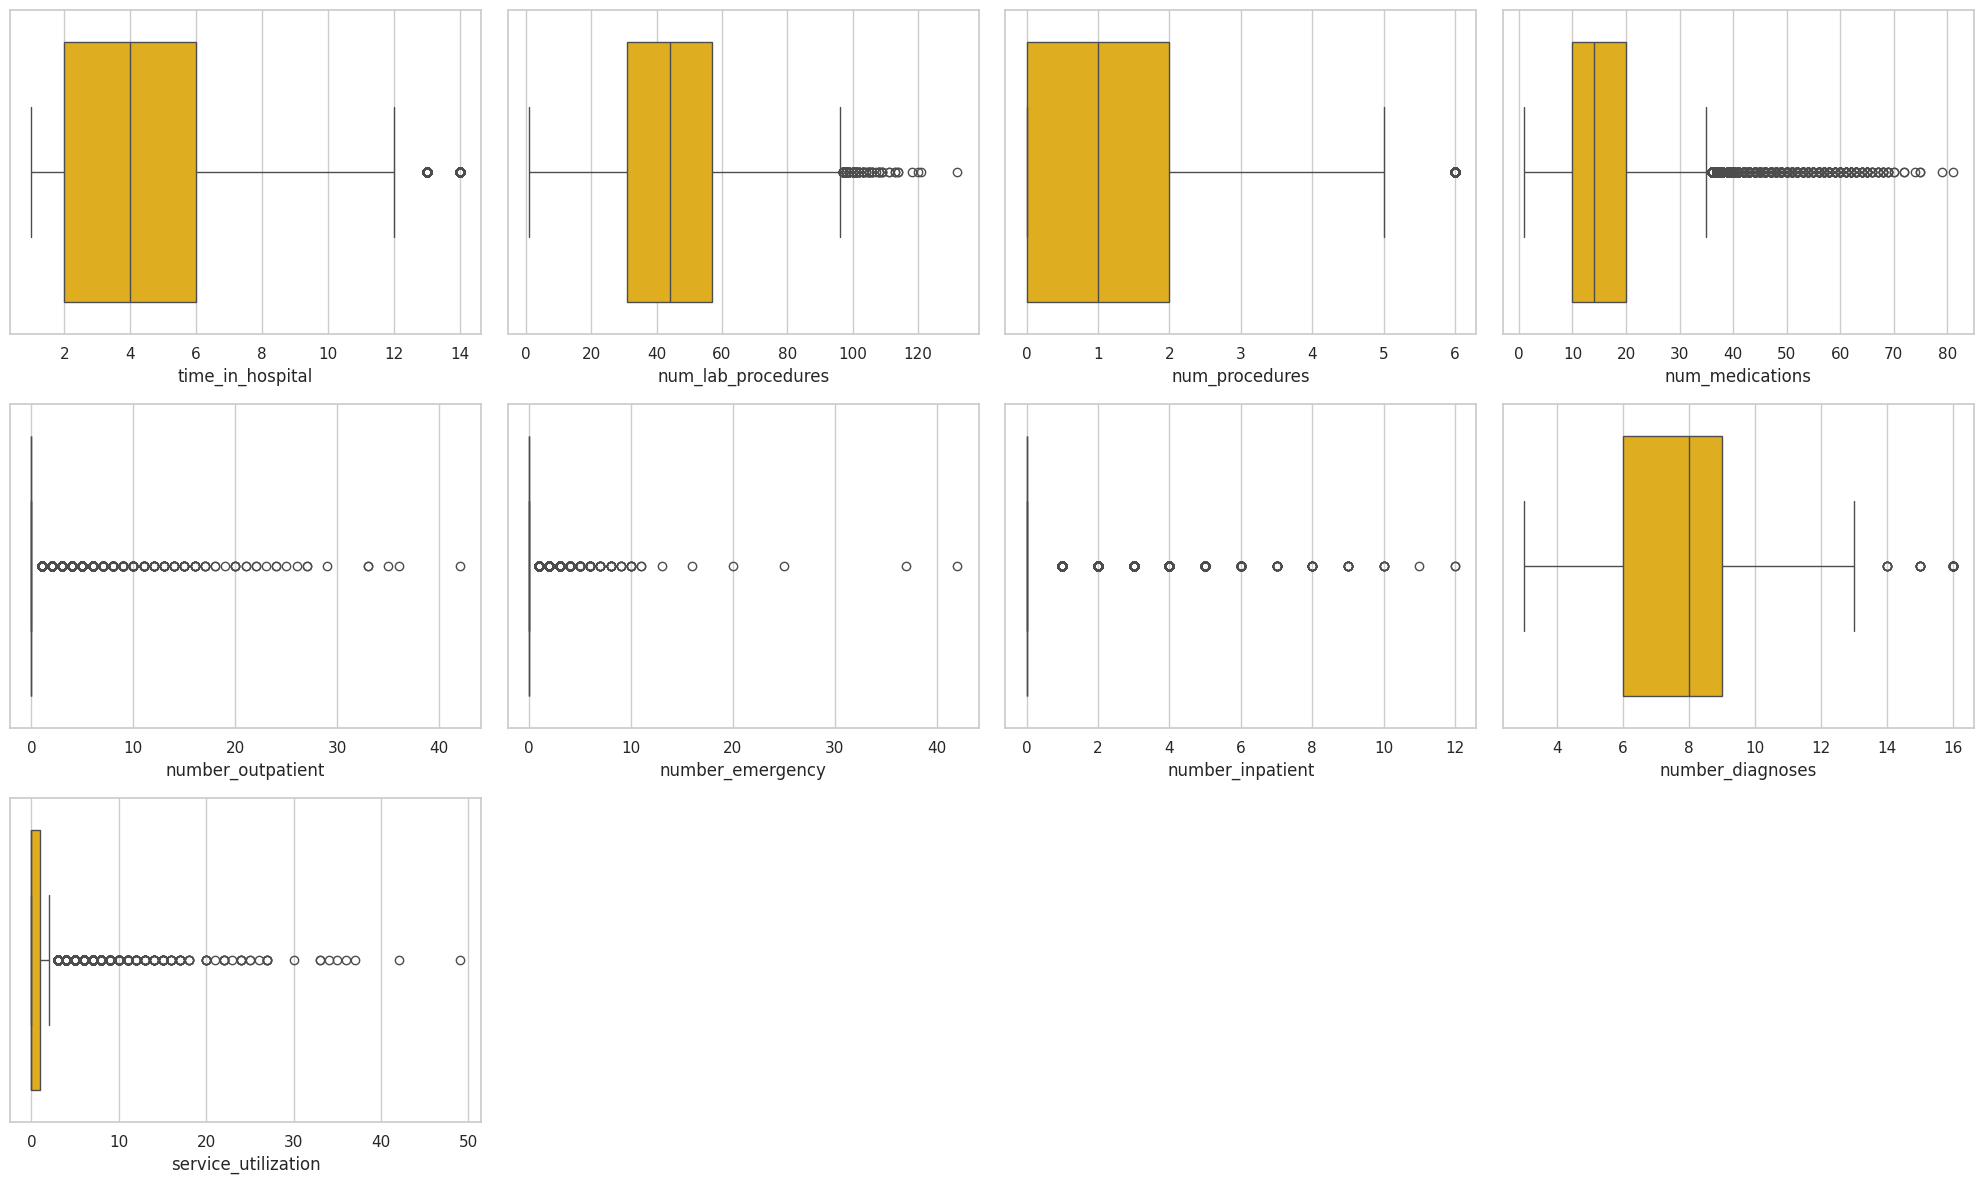

In [ ]:
continous_df = df.select_dtypes(include='number')
con_list = list(continous_df.columns)
print(con_list)

boxplot_for_outlier(df,con_list)

<ipython-input-254-3083c2e9cff8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[columns[count]], palette="Wistia", ax=ax[i][j])
<ipython-input-254-3083c2e9cff8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[columns[count]], palette="Wistia", ax=ax[i][j])
<ipython-input-254-3083c2e9cff8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[columns[count]], palette="Wistia", ax=ax[i][j])
<ipython-input-254-3083c2e9cff8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

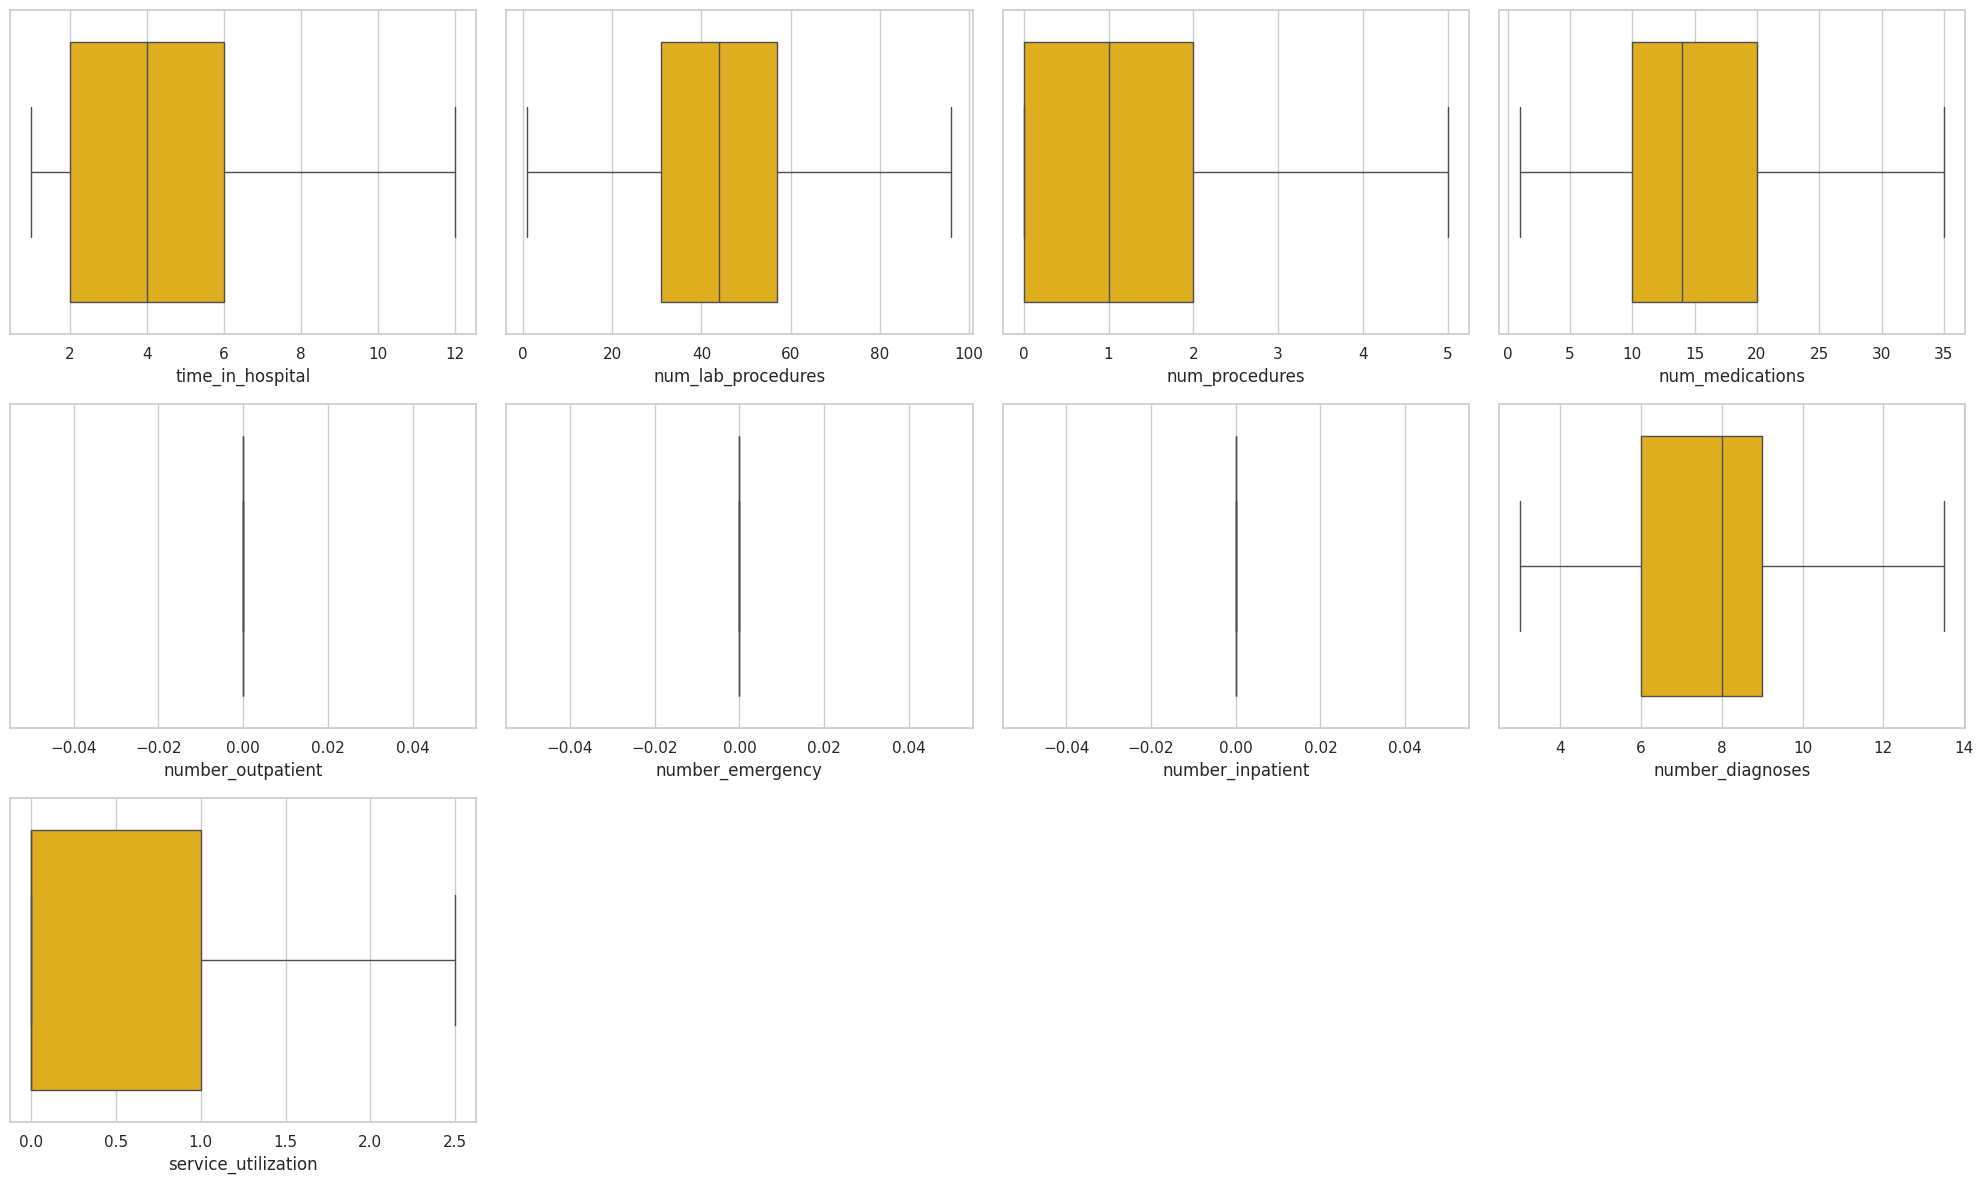

In [ ]:
for value in con_list:
    qr1 = df[f'{value}'].quantile(0.25)
    qr3 = df[f'{value}'].quantile(0.75)
    iqr = qr3 - qr1
    upper_bound = qr3 + 1.5 * iqr
    lower_bound = qr1 - 1.5 * iqr

    # upper_bound = qr3 + 2.0 * iqr
    # lower_bound = qr1 - 2.0 * iqr

    # Clamps values within the IQR bounds
    df[f"{value}"] = df[f"{value}"].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

df_for_bp = df._get_numeric_data()

boxplot_for_outlier(df,con_list)

## Transformations

In [ ]:
# transform readmissions into continuos data
df.readmitted = [1 if each=='<30' else 0 for each in df.readmitted]

<ipython-input-258-351ff7a6817a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.readmitted, data=df, palette="pastel",ax=ax[0], edgecolor=".3")


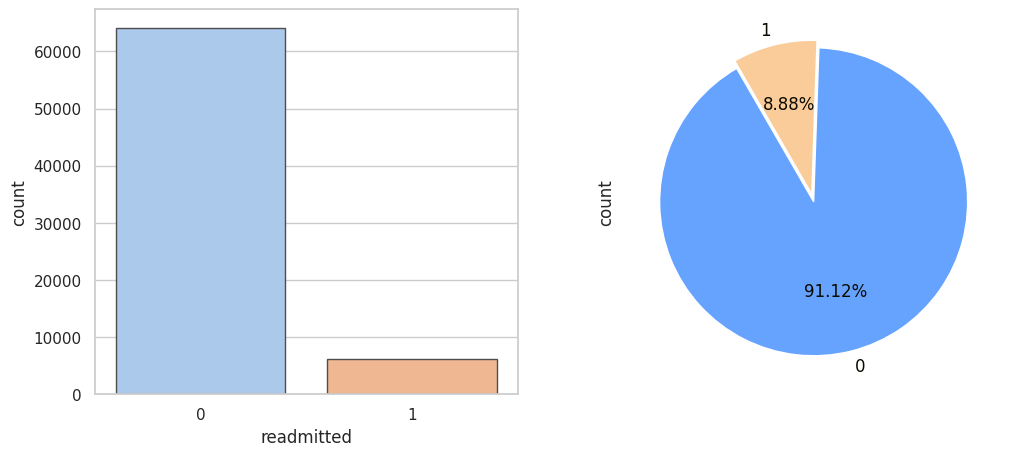

In [ ]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['0','1']
sns.countplot(x=df.readmitted, data=df, palette="pastel",ax=ax[0], edgecolor=".3")
df.readmitted.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'],
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

age transformation

In [ ]:
# This function, replace_age_ranges, takes a feature as input and 'values' represents corresponding numerical values assigned to each age range.

def replace_age_ranges(feature):
  age_ranges = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)','[60-70)', '[70-80)', '[80-90)', '[90-100)']
  values = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

  # The function iterates through the age_ranges and replaces each occurrence in the 'feature' with the corresponding numerical value.
  for i, age_range in enumerate(age_ranges):
    feature = feature.replace(age_range, values[i])

  return feature

In [ ]:
df['age'] = replace_age_ranges(df['age'])
df['age'] = df['age'].apply(lambda x: str(x))

<ipython-input-259-85c322ab440e>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  feature = feature.replace(age_range, values[i])


In [ ]:
# Diagnostics 1-2-3 Transform

diag_list = ['diag_1','diag_2','diag_3']

In [ ]:
# research paper might explain
import re
def transformFunc(value):
    value = re.sub("V[0-9]*", "0", value) # V
    value = re.sub("E[0-9]*", "0", value) # E
    value = re.sub('NaN', "-1", value) # Nan
    return value

def transformCategory(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==-1:
        category = 'NAN'
    else :
        category = 'Other'

    return category

In [ ]:
for diag in diag_list:
    df[diag] = df[diag].apply(transformFunc)
    df[diag] = df[diag].astype(float)

In [ ]:
for diag in diag_list:
    df[diag] = df[diag].apply(transformCategory)

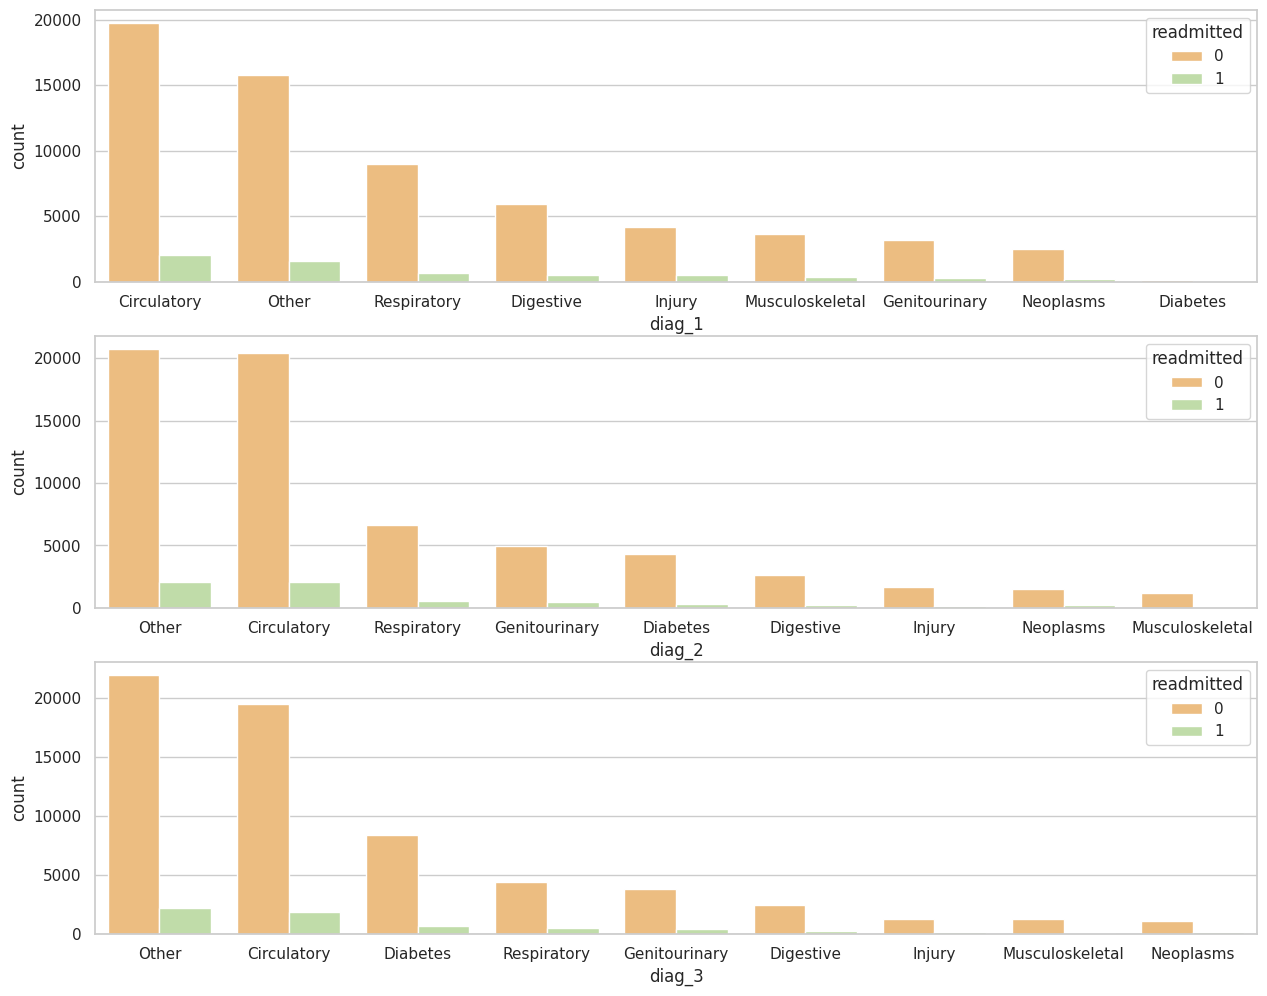

In [ ]:
fig, ax =plt.subplots(nrows=3,ncols=1,figsize=(15,12))
count =0
for i in diag_list:
    sns.countplot(x=df[i], hue=df['readmitted'], palette='Spectral', ax=ax[count], order=df[i].value_counts().index)
    count += 1

# admission type, discharge disposiont, and admission source mapping reductions

In [ ]:
# change admission_type_id, discharge_disposition_id, admission_source_id should be nominal data

df['admission_type_id'] = df['admission_type_id'].apply(lambda x: int(x))
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(lambda x: int(x))
df['admission_source_id'] = df['admission_source_id'].apply(lambda x: int(x))

df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

# change admission_type_id, discharge_disposition_id, admission_source_id should be nominal data

df['admission_type_id'] = df['admission_type_id'].apply(lambda x: str(x))
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(lambda x: str(x))
df['admission_source_id'] = df['admission_source_id'].apply(lambda x: str(x))

In [ ]:
# Iterating through each medicine column and converting 'No' to 0 and other values to 1.
# encode medecines since we want to encode either yes it was given or no it was not given

medicines = [ 'metformin', 'repaglinide','glimepiride', 'glipizide', 'glyburide',
              'pioglitazone', 'rosiglitazone', 'insulin']

for col in medicines:
    print(col)
    df[col] = df[col].apply(lambda x: 0 if x == 'No'  else 1)

metformin
repaglinide
glimepiride
glipizide
glyburide
pioglitazone
rosiglitazone
insulin


In [ ]:
# allow gender to change to male = 1 and female = 0
df['gender']=df['gender'].apply(lambda x: 0 if x=='Female' else 1)

In [ ]:
# allow change to be mapped to 0 == no change and 1 == change
df['change']=df['change'].apply(lambda x : 0 if x=='No' else 1)

In [ ]:
df['diabetesMed']=df['diabetesMed'].apply(lambda x : 0 if x=='No' else 1)

## Normalization

In [ ]:
# normalization function
def min_max_normalization(series, new_min, new_max):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return ([float(new_min)]  * len(series))  # Assign all values to new_min if all values in series are the same
    return (series - min_val) / (max_val - min_val) * (new_max - new_min) + new_min

# Apply Min-Max Normalization for each continuous feature
for column in df.select_dtypes(include=[np.number]).columns:
    #print(column)
    df[f"{column}"] = min_max_normalization(df[column], 0, 1)

In [ ]:
df.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,service_utilization
1,Caucasian,0.0,15,1,1,7,0.181818,0.610526,0.0,0.500000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,AfricanAmerican,0.0,25,1,1,7,0.090909,0.105263,1.0,0.352941,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,Caucasian,1.0,35,1,1,7,0.090909,0.452632,0.2,0.441176,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,Caucasian,1.0,45,1,1,7,0.000000,0.526316,0.0,0.205882,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
5,Caucasian,1.0,55,1,1,1,0.181818,0.315789,1.0,0.441176,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,Caucasian,1.0,65,3,1,1,0.272727,0.726316,0.2,0.588235,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
7,Caucasian,1.0,75,1,1,7,0.363636,0.757895,0.0,0.323529,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,Caucasian,0.0,85,1,1,4,1.000000,0.705263,0.4,0.794118,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
9,Caucasian,0.0,95,3,2,4,1.000000,0.336842,0.6,0.500000,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
10,AfricanAmerican,0.0,45,1,1,7,0.727273,0.484211,0.4,0.470588,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70413 entries, 1 to 101765
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      70413 non-null  object 
 1   gender                    70413 non-null  float64
 2   age                       70413 non-null  object 
 3   admission_type_id         70413 non-null  object 
 4   discharge_disposition_id  70413 non-null  object 
 5   admission_source_id       70413 non-null  object 
 6   time_in_hospital          70413 non-null  float64
 7   num_lab_procedures        70413 non-null  float64
 8   num_procedures            70413 non-null  float64
 9   num_medications           70413 non-null  float64
 10  number_outpatient         70413 non-null  float64
 11  number_emergency          70413 non-null  float64
 12  number_inpatient          70413 non-null  float64
 13  diag_1                    70413 non-null  object 
 14  diag_2    

# one-hot encoding


In [ ]:
df = pd.get_dummies(df, dtype=int)
df

,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,...,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,max_glu_serum_0.0,max_glu_serum_1.0,max_glu_serum_2.0,A1Cresult_0.0,A1Cresult_1.0,A1Cresult_2.0
1,0.0,0.181818,0.610526,0.0,0.500000,0.0,0.0,0.0,0.571429,0.0,...,0,0,1,0,1,0,0,1,0,0
2,0.0,0.090909,0.105263,1.0,0.352941,0.0,0.0,0.0,0.285714,0.0,...,0,0,1,0,1,0,0,1,0,0
3,1.0,0.090909,0.452632,0.2,0.441176,0.0,0.0,0.0,0.380952,0.0,...,0,0,0,0,1,0,0,1,0,0
4,1.0,0.000000,0.526316,0.0,0.205882,0.0,0.0,0.0,0.190476,0.0,...,0,0,0,0,1,0,0,1,0,0
5,1.0,0.181818,0.315789,1.0,0.441176,0.0,0.0,0.0,0.571429,0.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,0.0,0.727273,0.515789,0.4,0.941176,0.0,0.0,0.0,0.571429,0.0,...,0,0,1,0,1,0,0,0,0,1
101755,0.0,1.000000,0.757895,1.0,0.735294,0.0,0.0,0.0,0.571429,0.0,...,0,0,0,1,1,0,0,0,0,1
101756,0.0,0.090909,0.473684,1.0,0.470588,0.0,0.0,0.0,0.571429,0.0,...,0,0,0,0,1,0,0,1,0,0
101758,0.0,0.363636,0.789474,0.2,0.617647,0.0,0.0,0.0,0.571429,0.0,...,0,0,1,0,1,0,0,1,0,0


## Write to CSV file

In [ ]:
df.to_csv('RecallMe_pp.csv', index=False)